# Bookkeeping

In [1]:
import numpy as np
import pandas as pd
import itertools

from scipy.stats import norm, lognorm, truncnorm
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sys import getsizeof

In [2]:
from sedgen.input import Input
from sedgen import weathering

In [3]:
%load_ext line_profiler
%load_ext memory_profiler

In [4]:
# Load jupyter extension to reload packages before executing user code.
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
# Reload all packages (except those excluded by %aimport) every time before executing the Python code typed.
%autoreload 2

In [5]:
def calculate_volume_sphere(r, diameter=False):
    if diameter:
        r = r/2
    
    volume = 4/3 * r*r*r * np.pi
    return volume

In [6]:
def calculate_equivalent_circular_diameter(volume):
    diameter = 2 * (3/4 * volume / np.pi) ** (1/3)
    
    return diameter

In [2]:
test_norm = norm()

In [58]:
z = np.array([0.1, 0.05, 0.08, 0.02, 0.2, 0.3, 0.1, 0.15])

In [137]:
z * y / np.sum(z*y)

array([0.16460905, 0.0617284 , 0.06584362, 0.00823045, 0.08230453,
       0.24691358, 0.12345679, 0.24691358])

In [135]:
def grain_location_prob(a):
    """Creates an array descending and then ascending again to represent 
    chance of inter crystal breakage of a poly crystalline grain (pcg).
    The outer interfaces have a higher chance of breakage than the 
    inner ones based on their location within the pcg.
    This represents a linear function.
    Perhaps other functions might be added (spherical) to see the effects later on
    """
    n = a.size
    size = int(n/2)
    corr = n % 2 != 0
    chance = np.append(
                    np.arange(size+corr, 0, -1, dtype='uint32'), 
                    np.arange(1+corr, size+1+corr, 1, dtype='uint32')
             )
    return chance

In [129]:
a = np.random.randint(0, 5, 200000000, dtype='uint8')

In [130]:
%timeit grain_location_prob(a)

1.06 s ± 17.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [136]:
%lprun -f grain_location_prob grain_location_prob(a)

Timer unit: 1e-07 s

Total time: 0.981924 s
File: <ipython-input-135-78e081860892>
Function: grain_location_prob at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def grain_location_prob(a):
     2         1         31.0     31.0      0.0      n = a.size
     3         1         19.0     19.0      0.0      size = int(n/2)
     4         1          8.0      8.0      0.0      corr = n % 2 != 0
     5         1         11.0     11.0      0.0      chance = np.append(
     6         1    2410467.0 2410467.0     24.5                      np.arange(size+corr, 0, -1, dtype='uint32'), 
     7         1    7408682.0 7408682.0     75.5                      np.arange(1+corr, size+1+corr, 1, dtype='uint32')
     8                                                        )
     9         1         23.0     23.0      0.0      return chance

In [92]:
%%timeit
n = 100
size = int(n/2)
corr = n % 2 != 0
chance = np.append(np.arange(size+corr, 0, -1), np.arange(1+corr, size+1+corr, 1)).astype('uint32')

7.07 µs ± 200 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [93]:
chance

array([50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=uint32)

In [91]:
%%timeit
n = 100
size = int(n/2)
corr = n % 2 != 0
chance = np.array(list(range(size+corr, 0, -1)) + list(range(1+corr, size+1+corr, 1)), dtype='uint32')

8.45 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [80]:
%timeit range(0, 100, 1)

188 ns ± 7.02 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [81]:
%timeit np.arange(0, 100, 1)

774 ns ± 45.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [27]:
y= np.array([4, 3, 2, 1, 1, 2, 3, 4])

In [28]:
y / np.sum(y)

array([0.2 , 0.15, 0.1 , 0.05, 0.05, 0.1 , 0.15, 0.2 ])

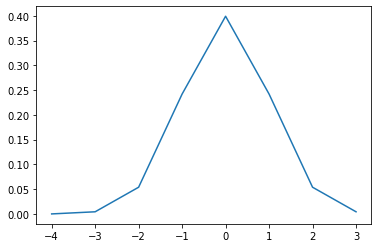

In [23]:
x = np.arange(-4, 4, 1)
plt.plot(x, norm.pdf(x))

In [24]:
sum_pdf = np.sum(norm.pdf(x)**-1)
normalized_pdf = norm.pdf(x)**-1 / sum_pdf

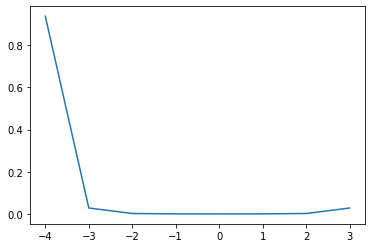

In [25]:
plt.plot(x, normalized_pdf)

In [15]:
testnorm = norm(0, 1)

In [51]:
testnorm_sample = testnorm.rvs(100000)

(array([2.0000e+01, 3.4300e+02, 2.9880e+03, 1.3163e+04, 2.9458e+04,
        3.1911e+04, 1.7147e+04, 4.3760e+03, 5.5800e+02, 3.6000e+01]),
 array([-4.42934353, -3.56304014, -2.69673675, -1.83043336, -0.96412997,
        -0.09782658,  0.76847681,  1.6347802 ,  2.50108359,  3.36738697,
         4.23369036]),
 <a list of 10 Patch objects>)

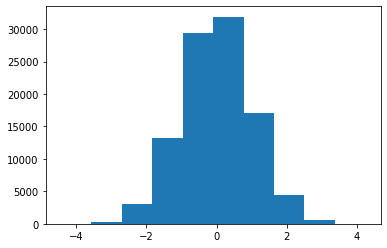

In [52]:
plt.hist(testnorm_sample)

In [35]:
mu = 0
sigma = 1

muL = np.exp(mu + 0.5*sigma**2)
sigmaL = np.exp(2*mu + sigma**2) * (np.exp(sigma**2) - 1)

In [109]:
mean_diam = np.log(0.120)
std_diam = 0.45

In [121]:
np.exp(0.45)

1.568312185490169

In [110]:
np.log(1.5)

0.4054651081081644

In [115]:
a, b = (-np.inf - mean_diam) / std_diam, (np.log(30) - mean_diam) / std_diam
a, b

(-inf, 12.26991315080499)

In [116]:
testnorm_trunc = truncnorm(loc=mean_diam, scale=std_diam, a=a, b=b)

(array([5.396107e+06, 3.985405e+06, 5.378970e+05, 6.821800e+04,
        1.017200e+04, 1.738000e+03, 3.680000e+02, 6.600000e+01,
        2.500000e+01, 4.000000e+00]),
 array([0.01111766, 0.12550662, 0.23989557, 0.35428453, 0.46867348,
        0.58306244, 0.69745139, 0.81184035, 0.92622931, 1.04061826,
        1.15500722]),
 <a list of 10 Patch objects>)

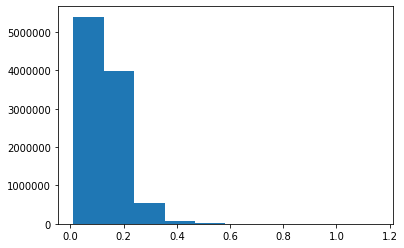

In [120]:
plt.hist(np.exp(testnorm_trunc.rvs(10000000)))

(array([   59.,   567.,  3952., 14248., 28289., 29974., 16937.,  5103.,
          806.,    65.]),
 array([-3.98369919, -3.61727289, -3.2508466 , -2.88442031, -2.51799402,
        -2.15156773, -1.78514144, -1.41871515, -1.05228885, -0.68586256,
        -0.31943627]),
 <a list of 10 Patch objects>)

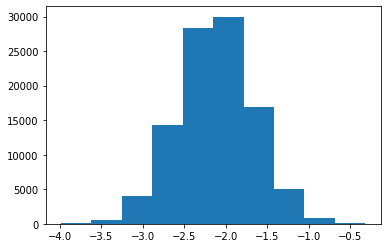

In [118]:
plt.hist(testnorm_trunc.rvs(100000))

In [36]:
muL
sigmaL

1.6487212707001282

4.670774270471604

In [53]:
np.median(np.exp(testnorm_sample))
np.mean(np.exp(testnorm_sample))
np.std(np.exp(testnorm_sample))

1.0023874704018616

1.641814648980638

2.1134418866662004

In [46]:
testlog_norm = lognorm(sigma, 0, np.exp(mu))

In [49]:
testlog_norm_sample = testlog_norm.rvs(100000)

In [50]:
np.median(testlog_norm_sample)
np.mean(testlog_norm_sample)
np.std(testlog_norm_sample)

0.9999245334682089

1.6425206061530582

2.1831273037119074

(array([9.9759e+04, 2.1900e+02, 1.6000e+01, 4.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.17846950e-02, 1.65431080e+01, 3.30744313e+01, 4.96057546e+01,
        6.61370779e+01, 8.26684012e+01, 9.91997245e+01, 1.15731048e+02,
        1.32262371e+02, 1.48793694e+02, 1.65325018e+02]),
 <a list of 10 Patch objects>)

(array([9.7409e+04, 2.1720e+03, 3.0700e+02, 7.1000e+01, 2.1000e+01,
        1.4000e+01, 1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.19223138e-02, 6.90785931e+00, 1.38037963e+01, 2.06997333e+01,
        2.75956703e+01, 3.44916073e+01, 4.13875443e+01, 4.82834813e+01,
        5.51794183e+01, 6.20753553e+01, 6.89712922e+01]),
 <a list of 10 Patch objects>)

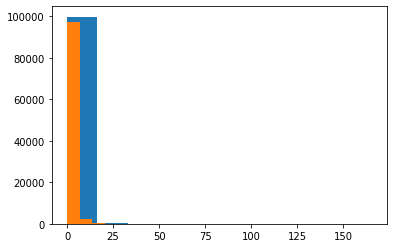

In [124]:
plt.hist(testlog_norm_sample)
plt.hist(np.exp(testnorm_sample))

In [5]:
getsizeof(["Q"])

72

In [15]:
getsizeof(["Q"]*200000000)/ 1024**2

1525.8789672851562

In [18]:
np.unique(np.array([0, 1, 2, 1, 0, 2, 1]), return_counts=True)

(array([0, 1, 2]), array([2, 3, 2], dtype=int64))

In [21]:
np.unique(np.array(["QQQQ", "QP", "QK", "Q"]), return_counts=True)

(array(['Q', 'QK', 'QP', 'QQQQ'], dtype='<U4'),
 array([1, 1, 1, 1], dtype=int64))

In [23]:
np.bincount(np.array([0, 1, 2, 4, 3, 2, 1, 0, 1, 0]))

array([3, 3, 2, 1, 1], dtype=int64)

In [24]:
def pairs_F(a):
    M = a.max() + 1
    a = np.ascontiguousarray(a.T) # contiguous columns (rows after .T)
                                  # appear to be typically perform better
                                  # thanks @ning chen
    return sum(np.bincount((M * a[j] + a[j+1:]).ravel(), None, M*M)
               for j in range(len(a) - 1)).reshape(M, M)

In [80]:
a = np.array([0, 1, 1, 2, 1])

In [57]:
for i in range(a.shape[0] - 1):
    print(a[i], a[i+1])

0 1
1 1
1 2


In [81]:
interfaces = []

for i in range(a.shape[0] - 1):
    interfaces.append((a[i], a[i+1]))

In [107]:
for i in itertools.combinations(np.array([0, 1, 2, 3, 2]), 2):
    print(i)

(0, 1)
(0, 2)
(0, 3)
(0, 2)
(1, 2)
(1, 3)
(1, 2)
(2, 3)
(2, 2)
(3, 2)


In [108]:
import more_itertools

In [111]:
for i in more_itertools.distinct_combinations(np.array([0, 1, 2, 3, 2]), 2):
    print(i)

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)
(2, 2)
(3, 2)


In [99]:
interfaces

[(0, 1), (1, 1), (1, 2), (2, 1)]

In [100]:
interfaces.sort()

In [101]:
interfaces

[(0, 1), (1, 1), (1, 2), (2, 1)]

In [98]:
np.unique(test)

array([0, 1, 2])

In [42]:
np.bincount(np.array([0, 1, 1]))

array([1, 2], dtype=int64)

In [127]:
a

array([0, 1, 1, 2, 1], dtype=uint8)

In [124]:
a = a.astype('uint8')
a.nbytes

5

array([[0, 1],
       [1, 2]], dtype=uint8)

In [141]:
a = np.random.randint(0, 6, size=int(1e7), dtype='uint8')

In [142]:
%timeit Counter(zip(a, a[1:]))

3.21 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [190]:
b = "QPQKBQQPQQPQPBBOQPQK" * 10000000

In [191]:
len(b)

200000000

In [7]:
labels = ["".join(pair) for pair in
             itertools.combinations_with_replacement("QPKBOA", 2)]

In [8]:
labels = ["".join(pair) for pair in
             itertools.product("QPKBOA", repeat=2)]

In [9]:
len(labels)

36

In [10]:
labels

['QQ',
 'QP',
 'QK',
 'QB',
 'QO',
 'QA',
 'PQ',
 'PP',
 'PK',
 'PB',
 'PO',
 'PA',
 'KQ',
 'KP',
 'KK',
 'KB',
 'KO',
 'KA',
 'BQ',
 'BP',
 'BK',
 'BB',
 'BO',
 'BA',
 'OQ',
 'OP',
 'OK',
 'OB',
 'OO',
 'OA',
 'AQ',
 'AP',
 'AK',
 'AB',
 'AO',
 'AA']

In [192]:
getsizeof(b) / 1024**2

190.7349100112915

In [11]:
list(itertools.combinations("QPKBOA", 2))

[('Q', 'P'),
 ('Q', 'K'),
 ('Q', 'B'),
 ('Q', 'O'),
 ('Q', 'A'),
 ('P', 'K'),
 ('P', 'B'),
 ('P', 'O'),
 ('P', 'A'),
 ('K', 'B'),
 ('K', 'O'),
 ('K', 'A'),
 ('B', 'O'),
 ('B', 'A'),
 ('O', 'A')]

In [12]:
number_freq = np.array([[0.3, 0.25, 0.2, 0.1, 0.05, 0.1]])

In [13]:
interface_weights = number_freq * number_freq.T
interface_weights

array([[0.09  , 0.075 , 0.06  , 0.03  , 0.015 , 0.03  ],
       [0.075 , 0.0625, 0.05  , 0.025 , 0.0125, 0.025 ],
       [0.06  , 0.05  , 0.04  , 0.02  , 0.01  , 0.02  ],
       [0.03  , 0.025 , 0.02  , 0.01  , 0.005 , 0.01  ],
       [0.015 , 0.0125, 0.01  , 0.005 , 0.0025, 0.005 ],
       [0.03  , 0.025 , 0.02  , 0.01  , 0.005 , 0.01  ]])

In [14]:
interface_weights_mod = np.array([[0.06  , 0.075 , 0.06  , 0.05  , 0.015 , 0.03  ],
                                  [0.075 , 0.0625, 0.05  , 0.025 , 0.0125, 0.025 ],
                                  [0.06  , 0.05  , 0.04  , 0.03  , 0.01  , 0.02  ],
                                  [0.03  , 0.025 , 0.02  , 0.01  , 0.005 , 0.01  ],
                                  [0.015 , 0.0125, 0.01  , 0.005 , 0.0025, 0.005 ],
                                  [0.03  , 0.025 , 0.01  , 0.02  , 0.005 , 0.01  ]])

In [15]:
interface_weights.sum(axis=1)

array([0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ])

In [16]:
interface_weights[0] / 0.3

array([0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ])

In [17]:
interface_weights_normalized = np.divide(interface_weights, np.sum(interface_weights, axis=1).reshape(-1, 1))

In [18]:
np.sum(interface_weights_mod, axis=0)

array([0.27, 0.25, 0.19, 0.14, 0.05, 0.1 ])

In [19]:
np.sum(interface_weights_mod, axis=1)

array([0.29, 0.25, 0.21, 0.1 , 0.05, 0.1 ])

In [20]:
interface_weights_normalized_mod = np.divide(interface_weights_mod, np.sum(interface_weights_mod, axis=1).reshape(-1, 1))

In [21]:
interface_weights_normalized

array([[0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
       [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
       [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
       [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
       [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
       [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ]])

In [22]:
interface_weights_normalized_mod

array([[0.20689655, 0.25862069, 0.20689655, 0.17241379, 0.05172414,
        0.10344828],
       [0.3       , 0.25      , 0.2       , 0.1       , 0.05      ,
        0.1       ],
       [0.28571429, 0.23809524, 0.19047619, 0.14285714, 0.04761905,
        0.0952381 ],
       [0.3       , 0.25      , 0.2       , 0.1       , 0.05      ,
        0.1       ],
       [0.3       , 0.25      , 0.2       , 0.1       , 0.05      ,
        0.1       ],
       [0.3       , 0.25      , 0.1       , 0.2       , 0.05      ,
        0.1       ]])

In [48]:
interface_weights_normalized_mod.sum(axis=1)

array([1., 1., 1., 1., 1., 1.])

In [51]:
interface_weights_normalized.sum(axis=1)

array([1., 1., 1., 1., 1., 1.])

In [34]:
interfaces_classification = {k:v for k,v in zip(range(36), labels)}

In [35]:
interfaces_classification

{0: 'QQ',
 1: 'QP',
 2: 'QK',
 3: 'QB',
 4: 'QO',
 5: 'QA',
 6: 'PQ',
 7: 'PP',
 8: 'PK',
 9: 'PB',
 10: 'PO',
 11: 'PA',
 12: 'KQ',
 13: 'KP',
 14: 'KK',
 15: 'KB',
 16: 'KO',
 17: 'KA',
 18: 'BQ',
 19: 'BP',
 20: 'BK',
 21: 'BB',
 22: 'BO',
 23: 'BA',
 24: 'OQ',
 25: 'OP',
 26: 'OK',
 27: 'OB',
 28: 'OO',
 29: 'OA',
 30: 'AQ',
 31: 'AP',
 32: 'AK',
 33: 'AB',
 34: 'AO',
 35: 'AA'}

In [25]:
%%time
test_array = np.zeros(200000, dtype='uint8')

for i in range(test_array.shape[0]):
    test_array[i] = np.random.choice(list(range(6)), 1, p=interface_weights_normalized_mod[test_array[i-1]])[0]

Wall time: 7.24 s


In [26]:
possibilities = np.arange(6, dtype='uint8')

In [27]:
%%time
Q = np.random.choice(possibilities, int(number_freq[0][0] * 200e6)+20000, p=interface_weights_normalized[0])
P = np.random.choice(possibilities, int(number_freq[0][1] * 200e6)+20000, p=interface_weights_normalized[1])
K = np.random.choice(possibilities, int(number_freq[0][2] * 200e6)+20000, p=interface_weights_normalized[2])
B = np.random.choice(possibilities, int(number_freq[0][3] * 200e6)+20000, p=interface_weights_normalized[3])
O = np.random.choice(possibilities, int(number_freq[0][4] * 200e6)+20000, p=interface_weights_normalized[4])
A = np.random.choice(possibilities, int(number_freq[0][5] * 200e6)+20000, p=interface_weights_normalized[5])

Wall time: 7.57 s


In [28]:
interfaces_random = [Q, P, K, B, O, A]

In [29]:
interfaces_random

[array([1, 1, 4, ..., 2, 0, 1], dtype=uint8),
 array([2, 0, 4, ..., 1, 1, 1], dtype=uint8),
 array([3, 0, 5, ..., 0, 0, 0], dtype=uint8),
 array([1, 3, 1, ..., 3, 3, 2], dtype=uint8),
 array([0, 3, 1, ..., 1, 3, 5], dtype=uint8),
 array([4, 0, 2, ..., 1, 1, 3], dtype=uint8)]

In [30]:
def generate_interface_array(interfaces_random, N=200e6, print_step=1000000):
    
#     test_array = np.zeros(int(N), dtype='int8')
    test_array = [0]
    append_ = test_array.append
    counters = [0, 0, 0, 0, 0, 0]
#     array_size_range = range(test_array.shape[0])
    array_size_range = range(int(N))

    for i in array_size_range:
        previous_state = test_array[i-1]
#         test_array[i] = interfaces_random[previous_state][counters[previous_state]]
        append_(interfaces_random[previous_state][counters[previous_state]])
        counters[previous_state] += 1
#         if i % print_step == 0:
#             print(i, end=" ")
            
    return test_array

In [31]:
%time tester = generate_interface_array(interfaces_random, N=200e6, print_step=100000)

Wall time: 1min 6s


In [32]:
%time tester_array = np.array(tester[1:], dtype='uint8')

Wall time: 16 s


In [33]:
tester_array.shape

(200000000,)

In [36]:
# Almost two times faster to perform Counter operation on list (18s) than on numpy array (30s)
# By using list, also no need to convert list to numpy array which also takes 16s.

# However, once the conversion to a numpy array has been made, 
# using np.unique is 4 times faster (4.5s) than Counter on list (18s)
%time Counter(tester[1:])

Wall time: 18.2 s


Counter({1: 50006424,
         2: 39996190,
         0: 59998657,
         3: 20000085,
         4: 9995320,
         5: 20003324})

In [37]:
%time Counter(tester_array)

Wall time: 30.3 s


Counter({1: 50006424,
         2: 39996190,
         0: 59998657,
         3: 20000085,
         4: 9995320,
         5: 20003324})

In [38]:
%time np.unique(tester_array, return_counts=True)

Wall time: 4.66 s


(array([0, 1, 2, 3, 4, 5], dtype=uint8),
 array([59998657, 50006424, 39996190, 20000085,  9995320, 20003324],
       dtype=int64))

In [43]:
%time tester_interfaces_list = list(zip(tester, tester[1:]))

Wall time: 29.8 s


In [54]:
interface_weights_normalized[np.array(tester_interfaces_list[:10]).reshape(2, -1)]

array([[[0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ]],

       [[0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ],
        [0.3 , 0.25, 0.2 , 0.1 , 0.05, 0.1 ]]])

In [66]:
# It takes 2min14s to create a 1D array of interface strengths which could be used
# for the purpose of calculating the probablity of intercrystal breakage.
%time interface_strengths = [interface_weights_normalized[i] for i in tester_interfaces_list]

Wall time: 2min 14s


In [53]:
np.array(tester_interfaces_list[:10]).reshape(2, -1)

array([[0, 1, 1, 1, 1, 2, 2, 0, 0, 3],
       [3, 4, 4, 1, 1, 0, 0, 4, 4, 1]])

In [107]:
%time tester_interfaces_list = list(zip(tester_array, tester_array[1:]))

Wall time: 41 s


In [109]:
%time Counter(tester_interfaces_list)

Wall time: 1min 10s


Counter({(1, 1): 12501034,
         (1, 5): 5001109,
         (5, 0): 5996664,
         (0, 2): 11998861,
         (2, 5): 3999121,
         (0, 5): 5996181,
         (5, 2): 4000842,
         (2, 0): 12005883,
         (0, 1): 15001868,
         (1, 2): 10001612,
         (1, 4): 2499466,
         (4, 2): 2001046,
         (1, 0): 14994759,
         (0, 0): 18002872,
         (5, 3): 1999931,
         (3, 1): 4999903,
         (0, 3): 5998998,
         (3, 2): 3998986,
         (2, 1): 9995532,
         (5, 1): 4999178,
         (1, 3): 5000907,
         (3, 0): 6001884,
         (3, 3): 1999783,
         (3, 4): 998597,
         (2, 2): 8005469,
         (5, 5): 1999881,
         (0, 4): 3001632,
         (4, 3): 999258,
         (2, 4): 2001013,
         (4, 0): 2998350,
         (2, 3): 3999798,
         (4, 1): 2501371,
         (3, 5): 1999521,
         (4, 5): 999460,
         (5, 4): 998777,
         (4, 4): 500452})

In [ ]:
%time tester_interfaces = np.array(list(zip(tester_array, tester_array[1:])))

In [106]:
%time np.unique(tester_interfaces, axis=0, return_counts=True)

Wall time: 3min


(array([[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [0, 4],
        [0, 5],
        [1, 0],
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [2, 0],
        [2, 1],
        [2, 2],
        [2, 3],
        [2, 4],
        [2, 5],
        [3, 0],
        [3, 1],
        [3, 2],
        [3, 3],
        [3, 4],
        [3, 5],
        [4, 0],
        [4, 1],
        [4, 2],
        [4, 3],
        [4, 4],
        [4, 5],
        [5, 0],
        [5, 1],
        [5, 2],
        [5, 3],
        [5, 4],
        [5, 5]], dtype=uint8),
 array([18002872, 15001868, 11998861,  5998998,  3001632,  5996181,
        14994759, 12501034, 10001612,  5000907,  2499466,  5001109,
        12005883,  9995532,  8005469,  3999798,  2001013,  3999121,
         6001884,  4999903,  3998986,  1999783,   998597,  1999521,
         2998350,  2501371,  2001046,   999258,   500452,   999460,
         5996664,  4999178,  4000842,  1999931,   998777,  1999881],


In [84]:
%lprun -f generate_interface_array generate_interface_array(interfaces_random, N=200e6, print_step=100000)

Timer unit: 1e-07 s

Total time: 379.341 s
File: <ipython-input-82-e7e0c7908bd2>
Function: generate_interface_array at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def generate_interface_array(interfaces_random, N=200e6, print_step=1000000):
     2                                               
     3                                           #     test_array = np.zeros(int(N), dtype='int8')
     4         1         16.0     16.0      0.0      test_array = [0]
     5         1          6.0      6.0      0.0      append_ = test_array.append
     6         1          4.0      4.0      0.0      counters = [0, 0, 0, 0, 0, 0]
     7                                           #     array_size_range = range(test_array.shape[0])
     8         1         19.0     19.0      0.0      array_size_range = range(int(N))
     9                                           
    10 200000001  716632278.0      3.6     18.9      for i 

In [73]:
%lprun -f generate_interface_array generate_interface_array(interfaces_random, N=200e5, print_step=100000)

Timer unit: 1e-07 s

Total time: 43.6296 s
File: <ipython-input-72-be577a1cd306>
Function: generate_interface_array at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def generate_interface_array(interfaces_random, N=200e6, print_step=1000000):
     2                                               
     3         1        960.0    960.0      0.0      test_array = np.zeros(int(N), dtype='int8')
     4         1         15.0     15.0      0.0      counters = [0, 0, 0, 0, 0, 0]
     5         1         47.0     47.0      0.0      array_size_range = range(test_array.shape[0])
     6                                           
     7  20000001   74305834.0      3.7     17.0      for i in array_size_range:
     8  20000000  113013973.0      5.7     25.9          previous_state = test_array[i-1]
     9  20000000  149443983.0      7.5     34.3          test_array[i] = interfaces_random[previous_state][counters[previous_state

In [64]:
%lprun -f generate_interface_array generate_interface_array(interfaces_random, N=200e5, print_step=100000)

Timer unit: 1e-07 s

Total time: 44.086 s
File: <ipython-input-63-09fad20cf78c>
Function: generate_interface_array at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def generate_interface_array(interfaces_random, N=200e6, print_step=1000000):
     2                                               
     3         1        652.0    652.0      0.0      test_array = np.zeros(int(N), dtype='int8')
     4         1         13.0     13.0      0.0      counters = [0, 0, 0, 0, 0, 0]
     5                                           
     6  20000001   75411216.0      3.8     17.1      for i in range(test_array.shape[0]):
     7  20000000  112402222.0      5.6     25.5          previous_state = test_array[i-1]
     8  20000000  150376735.0      7.5     34.1          test_array[i] = interfaces_random[previous_state][counters[previous_state]]
     9  20000000  102668685.0      5.1     23.3          counters[previous_state] += 1


In [58]:
%lprun -f generate_interface_array generate_interface_array(interfaces_random, N=200e5, print_step=100000)

Timer unit: 1e-07 s

Total time: 45.8351 s
File: <ipython-input-57-90d8ca319a41>
Function: generate_interface_array at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def generate_interface_array(interfaces_random, N=200e6, print_step=1000000):
     2                                               
     3         1       1382.0   1382.0      0.0      test_array = np.zeros(int(N), dtype='int8')
     4         1         16.0     16.0      0.0      counters = [0, 0, 0, 0, 0, 0]
     5                                           
     6  20000001   80812517.0      4.0     17.6      for i in range(test_array.shape[0]):
     7  20000000  229640999.0     11.5     50.1          test_array[i] = interfaces_random[test_array[i-1]][counters[test_array[i-1]]]
     8  20000000  147896534.0      7.4     32.3          counters[test_array[i-1]] += 1
     9                                           #         if i % print_step == 0:
   

In [154]:
from scipy.stats import multinomial

In [167]:
multinomial(6, [0.3, 0.25, 0.15, 0.15, 0.05, 0.1]).rvs(1)

array([[2, 2, 0, 0, 0, 2]])

In [87]:
test_array

(200000,)

In [64]:
test_array

array([1, 0, 0, ..., 3, 4, 2], dtype=int8)

In [125]:
Counter(test_array)

Counter({5: 9885, 4: 4986, 1: 25151, 3: 10057, 0: 30108, 2: 19813})

In [68]:
(54192/200000)**2

0.07341932159999999

In [69]:
11099/200000

0.055495

In [175]:
test_array[:10]

array([0, 3, 1, 2, 1, 0, 5, 0, 0, 5], dtype=int8)

In [183]:
next(zip(test_array, test_array[1:]))

(0, 3)

In [207]:
tuple(np.array([(4, 3), (0, 4), (5, 1)]).T)

(array([4, 0, 5]), array([3, 4, 1]))

In [209]:
interface_weights_normalized[tuple(np.array([zip(test_array, test_array[1:])]).T)]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [194]:
interface_weights_normalized[tuple(zip(test_array, test_array[1:]))]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [99]:
Counter(zip(test_array, test_array[1:]))

Counter({(3, 4): 487,
         (4, 2): 1017,
         (2, 2): 3902,
         (2, 1): 4965,
         (1, 0): 7469,
         (0, 5): 3022,
         (5, 0): 2974,
         (0, 0): 8951,
         (0, 2): 6000,
         (2, 3): 2053,
         (3, 2): 2062,
         (2, 0): 6064,
         (0, 1): 7499,
         (1, 1): 6199,
         (1, 3): 2516,
         (3, 3): 1018,
         (3, 0): 3087,
         (0, 4): 1469,
         (4, 1): 1191,
         (1, 2): 5021,
         (0, 3): 3082,
         (5, 1): 2448,
         (2, 5): 2025,
         (5, 5): 1005,
         (5, 2): 1999,
         (2, 4): 992,
         (4, 0): 1478,
         (1, 5): 2354,
         (5, 3): 1022,
         (1, 4): 1290,
         (4, 5): 491,
         (4, 3): 533,
         (3, 5): 1023,
         (3, 1): 2547,
         (5, 4): 472,
         (4, 4): 272})

In [270]:
c = np.random.randint(0, 6, 100000)

In [286]:
np.array([[0.4/2, 0.6/2],
          [0.7/2, 0.3/2]])

array([[0.2 , 0.3 ],
       [0.35, 0.15]])

In [273]:
a_chance = [0.4, 0.6]
b_chance = [0.7, 0.3]

In [297]:
%timeit np.random.choice(np.array([0, 1, 2]), size=1000)

36.9 µs ± 950 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [299]:
%%timeit
for i in range(1000):
    np.random.choice(np.array([0, 1, 2]), size=1)

26.8 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [293]:
%%time
test_list = ["a"]
for i in range(100000):
    if test_list[i] == "a":
        test_list.append(np.random.choice(["a", "b"], 1, p=a_chance)[0])
    else:
        test_list.append(np.random.choice(["a", "b"], 1, p=b_chance)[0])

Wall time: 3.21 s


In [321]:
test_list = np.random.choice(np.array([0, 1, 2, 3, 4, 5]), size=100000, p=modal[0])

In [322]:
test_list

array([1, 5, 0, ..., 1, 2, 0])

In [294]:
test_string = "".join(test_list)

In [295]:
Counter(zip(test_string, test_string[1:]))

Counter({('a', 'b'): 32228,
         ('b', 'a'): 32227,
         ('b', 'b'): 13773,
         ('a', 'a'): 21772})

In [330]:
9028/99999

0.09028090280902809

In [329]:
Counter(zip(test_list, test_list[1:]))

Counter({(1, 5): 2530,
         (5, 0): 3033,
         (0, 5): 2949,
         (5, 1): 2443,
         (1, 0): 7403,
         (0, 2): 6081,
         (2, 5): 1985,
         (5, 5): 1017,
         (1, 2): 5038,
         (2, 0): 6079,
         (0, 1): 7549,
         (0, 0): 9028,
         (0, 4): 1464,
         (4, 0): 1502,
         (5, 2): 2030,
         (2, 1): 5026,
         (1, 4): 1244,
         (2, 4): 990,
         (4, 1): 1228,
         (2, 2): 4096,
         (0, 3): 2973,
         (3, 2): 1950,
         (3, 0): 3000,
         (4, 5): 512,
         (2, 3): 1990,
         (3, 5): 966,
         (1, 3): 2464,
         (1, 1): 6339,
         (3, 1): 2432,
         (4, 4): 256,
         (4, 2): 971,
         (5, 4): 493,
         (3, 3): 1015,
         (4, 3): 479,
         (3, 4): 501,
         (5, 3): 943})

In [328]:
np.sum(list(Counter(zip(test_list, test_list[1:])).values()))

99999

In [19]:
s = np.random.choice(np.array(labels), size=100000, p=interface_weights.flatten())

In [20]:
s

array(['BB', 'KQ', 'QB', ..., 'KQ', 'QQ', 'AQ'], dtype='<U2')

In [271]:
%timeit np.vectorize(interfaces_classification.get)(c)

11.9 ms ± 265 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [272]:
%%timeit
u,inv = np.unique(c, return_inverse = True)
np.array([interfaces_classification[x] for x in u])[inv].reshape(c.shape)

4.82 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [214]:
%%time
for label in labels:
    b.count(label)

Wall time: 4.22 s


In [220]:
%%time
for label in labels:
    b.count(label[:100000000])
    b.count(label[100000000:])

Wall time: 4.24 s


In [219]:
%time list(map(b.count, labels))

Wall time: 4.32 s


[50000000,
 20000000,
 0,
 0,
 0,
 40000000,
 0,
 10000000,
 0,
 0,
 9999999,
 0,
 10000000,
 0,
 0,
 10000000,
 0,
 0,
 10000000,
 0,
 10000000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [176]:
%timeit Counter(zip(b, b[1:]))

3.68 s ± 320 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [150]:
%load_ext line_profiler

In [135]:
for i in zip(a, a[1:]):
    print(i)

(0, 1)
(1, 1)
(1, 2)
(2, 1)


In [144]:
%timeit zip(a, a[1:])

392 ns ± 13.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [149]:
zip(a, a[1:])

In [50]:
a = np.array([0, 1, 1, 2])
M = a.max() + 1
a = np.ascontiguousarray(a.T)
print(a)

for j in range(len(a)):
    print(M, j)
    M * a[j] + a[j+1:]
    np.bincount((M * a[j] + a[j+1:]).ravel())

[0 1 1 2]
3 0


array([1, 1, 2])

array([0, 2, 1], dtype=int64)

3 1


array([4, 5])

array([0, 0, 0, 0, 1, 1], dtype=int64)

3 2


array([5])

array([0, 0, 0, 0, 0, 1], dtype=int64)

3 3


array([], dtype=int32)

array([], dtype=int64)

In [26]:
def pairs_dict(a):
    p = pairs_F(a)
    # p is a 2D table with the frequency of (y, x) at position y, x
    y, x = np.where(p)
    c = p[y, x]
    return {(yi, xi): ci for yi, xi, ci in zip(y, x, c)}

In [33]:
%timeit pairs_dict(np.random.randint(0, 6, size=1000))

6.16 ms ± 462 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%timeit pairs_F(np.random.randint(0, 6, size=1000))

5.24 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [37]:
test_interfaces = pairs_F(np.random.randint(0, 6, size=1000))

In [40]:
pairs_F(np.array([0, 1, 1]))

array([[0, 2],
       [0, 1]], dtype=int64)

In [38]:
test_interfaces.sum()

499500

In [4]:
tester = np.zeros((6, 2000), dtype='int32')

In [5]:
tester[0].shape

(2000,)

In [7]:
tester[0]

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
bins = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
bins = bins.astype('str')

In [22]:
counts = np.array([0, 1, 2, 0, 4, 5, 6, 8, 0, 0])

In [35]:
dict_ = {}

for bin_, count in zip(bins, counts):
    if count == 0:
        continue
    else:
        dict_[bin_] = count

In [39]:
dict_

{'1': 1, '2': 2, '4': 4, '5': 5, '6': 6, '7': 8}

In [1]:
from sys import getsizeof

In [8]:
200e6 * getsizeof("Q") / 1024**2

9536.7431640625

In [21]:
getsizeof(np.array(["Q"]*200000000)) / 1024**2

762.9395446777344

In [54]:
np.array([0.1], dtype='float64').nbytes

8

In [88]:
8 * 200e6 / 1024**2

1525.87890625

In [90]:
4 * 6 * 2000 / 1024**2

0.0457763671875

In [93]:
np.zeros((6, 2000), dtype='uint32').nbytes

48000

In [68]:
test_norm = norm(5, 1)

(array([9.317e+03, 5.390e+02, 1.080e+02, 2.100e+01, 1.000e+01, 3.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([2.50937721e+00, 6.55048267e+02, 1.30758716e+03, 1.96012605e+03,
        2.61266494e+03, 3.26520383e+03, 3.91774272e+03, 4.57028161e+03,
        5.22282050e+03, 5.87535939e+03, 6.52789828e+03]),
 <a list of 10 Patch objects>)

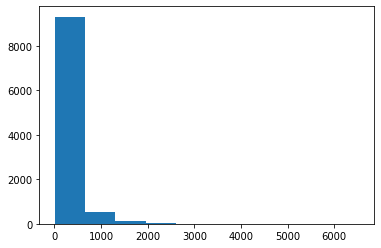

In [69]:
plt.hist(np.exp(test_norm.rvs(10000)))

In [86]:
test_log = lognorm(s=2, loc=0, scale=np.exp(0.5))

(array([9.995e+03, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.70535355e-04, 1.20536253e+03, 2.41072479e+03, 3.61608706e+03,
        4.82144932e+03, 6.02681158e+03, 7.23217384e+03, 8.43753610e+03,
        9.64289836e+03, 1.08482606e+04, 1.20536229e+04]),
 <a list of 10 Patch objects>)

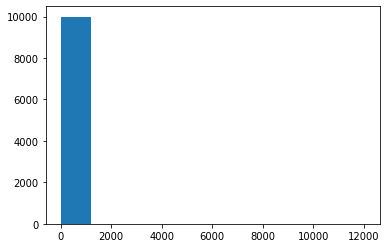

In [87]:
plt.hist(test_log.rvs(10000))

In [55]:
8 * 200e6 / 1024**2

1525.87890625

In [45]:
getsizeof(np.array(["0"]*200000000, dtype='uint8')) / 1024**2

TypeError: data type "uint4" not understood

In [30]:
test = np.array(["0"]*10)
test

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], dtype='<U1')

In [32]:
200e6 / 1024**2

190.73486328125

In [18]:
np.array(["Q"]*10000).nbytes

40000

In [6]:
getsizeof(1)

28

In [68]:
{np.array(bins[:-1]), tester[0]}

TypeError: unhashable type: 'numpy.ndarray'

In [53]:
tester.nbytes / 1024 / 1024

0.0457763671875

The input of data needs to be split up into two parts:
- 1. Firstly, the part of data that comes from the dataset entered into the model, this needs to be boiled down to the fundamental properties (modal mineralogy, intefacial data, and crystal size data) + properties of the environment
- 2. Secondly, for all of the parameters for which no corresponding data was entered, a substiutute needs to be constructed. For the fundamental properties this can fall back on the relations discovered during the PhD (e.g. lognormal CSD). The environmental properties might be selected by the user, nonetheless.

## 1. Modal mineralogy

In [44]:
# Minerals present
minerals = ["Q" ,"P", "K", "B", "O", "A"]

In [45]:
modal_mineralogy = np.array([0.3, 0.35, 0.15, 0.10, 0.02, 0.08])

In [46]:
prng = np.random.RandomState(1234)

In [47]:
test = prng.choice(np.array([0, 1, 2, 3, 4, 5]), size=20000, replace=True, p=modal_mineralogy)

In [48]:
_, counts = np.unique(test, return_counts=True)

In [49]:
counts

array([6005, 6943, 3067, 1940,  384, 1661], dtype=int64)

## 2. CSD

In [50]:
# You can pass in the arithmetic standard deviation as s (= the shape)
# You can pass in the exponent of the arithmetic mean as the scale
# You can pass in the geometric mean as the scale

In [31]:
# Example values based on AZ from Heins(1992)
csds = np.array([
    lognorm(s=np.exp(0.359), loc=0, scale=0.120),
    lognorm(s=np.exp(0.356), loc=0, scale=0.174),
    lognorm(s=np.exp(0.455), loc=0, scale=0.112),
    lognorm(s=np.exp(0.399), loc=0, scale=0.155),
    lognorm(s=np.exp(0.328), loc=0, scale=0.066),
    lognorm(s=np.exp(0.452), loc=0, scale=0.079),
])

(array([4.40000e+01, 9.90000e+02, 1.47530e+04, 9.69600e+04, 2.80442e+05,
        3.56126e+05, 1.97393e+05, 4.79920e+04, 5.06100e+03, 2.39000e+02]),
 array([-9.24658678, -7.89899873, -6.55141068, -5.20382262, -3.85623457,
        -2.50864652, -1.16105847,  0.18652958,  1.53411763,  2.88170568,
         4.22929373]),
 <a list of 10 Patch objects>)

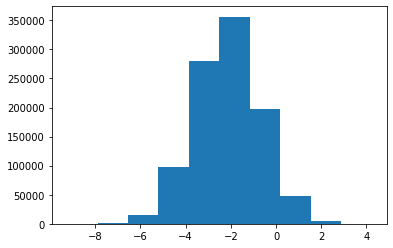

In [33]:
plt.hist(np.log(csds[0].rvs(1000000)))

In [18]:
def get_truncnorm(mean, std, trunc_left, trunc_right):
    mean = np.log(mean)
    std = np.exp(std)
    trunc_right = np.log(trunc_right)
    a, b = (trunc_left - mean) / std, (trunc_right - mean) / std
    return truncnorm(loc=mean, scale=std, a=a, b=b)

In [94]:
# Modal mineralogy mean values per pluton of Heins(1992)
modal_mineralogy = np.array([[0.16331256, 0.46387757, 0.12683457, 0.05758711, 0.01078412, 0.17760407],   # AZ
                             [0.27453254, 0.40124204, 0.24993859, 0.02509231, 0.00454988, 0.04464465],   # CA-EW
                             [0.30591989, 0.38159713, 0.26209888, 0.0188256 , 0.00799247, 0.02356603],   # CA-NS
                             [0.19781274, 0.41766034, 0.16121575, 0.06478527, 0.00894429, 0.14958161],   # GR
                             [0.25983144, 0.46392506, 0.15827298, 0.04370113, 0.00689158, 0.06737782],   # MT
                             [0.22419158, 0.48490082, 0.05641885, 0.11571367, 0.        , 0.11877509]])  # WA

In [20]:
# Example values based on AZ from Heins(1992)
csds_AZ = np.array([
    get_truncnorm(mean=0.120, std=0.359, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.174, std=0.356, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.112, std=0.455, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.155, std=0.399, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.066, std=0.328, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.079, std=0.452, trunc_left=-np.inf, trunc_right=30),
])

In [88]:
# Example values based on CA_EW from Heins(1992)
csds_CA_EW = np.array([
    get_truncnorm(mean=0.247, std=0.986, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.333, std=0.640, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.292, std=0.497, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.212, std=0.889, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.090, std=0.275, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.127, std=0.502, trunc_left=-np.inf, trunc_right=30),
])

In [52]:
# Example values based on CA_NS from Heins(1992)
csds_CA_NS = np.array([
    get_truncnorm(mean=0.309, std=0.823, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.330, std=0.683, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.244, std=0.817, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.223, std=0.819, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.120, std=0.554, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.122, std=0.782, trunc_left=-np.inf, trunc_right=30),
])

In [89]:
# Example values based on GR from Heins(1992)
csds_GR = np.array([
    get_truncnorm(mean=0.244, std=0.312, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.269, std=0.450, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.222, std=0.444, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.251, std=0.262, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.059, std=0.378, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.107, std=0.313, trunc_left=-np.inf, trunc_right=30),
])

In [90]:
# Example values based on MT from Heins(1992)
csds_MT = np.array([
    get_truncnorm(mean=0.220, std=0.472, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.227, std=0.415, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.160, std=0.344, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.153, std=0.363, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.078, std=0.315, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.075, std=0.599, trunc_left=-np.inf, trunc_right=30),
])

In [92]:
# Example values based on WA from Heins(1992)
csds_WA = np.array([
    get_truncnorm(mean=0.342, std=0.542, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.385, std=0.478, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.241, std=0.386, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.481, std=0.467, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.001, std=0.001, trunc_left=-np.inf, trunc_right=30),
    get_truncnorm(mean=0.130, std=0.494, trunc_left=-np.inf, trunc_right=30),
])

In [77]:
mean_Q, std_Q = np.log(0.079), np.exp(0.452)
trunc_left, trunc_right = -np.inf, np.log(30)  # No crystals bigger than 30 mm
a_Q, b_Q = (trunc_left - mean_Q) / std_Q, (trunc_right - mean_Q) / std_Q
truncnorm_Q = truncnorm(loc=mean_Q, scale=std_Q, a=a_Q, b=b_Q)

(array([9.87622e+05, 9.22600e+03, 1.93200e+03, 6.23000e+02, 2.82000e+02,
        1.32000e+02, 1.01000e+02, 3.70000e+01, 2.60000e+01, 1.90000e+01]),
 array([9.75120274e-05, 2.97356484e+00, 5.94703216e+00, 8.92049949e+00,
        1.18939668e+01, 1.48674341e+01, 1.78409015e+01, 2.08143688e+01,
        2.37878361e+01, 2.67613034e+01, 2.97347708e+01]),
 <a list of 10 Patch objects>)

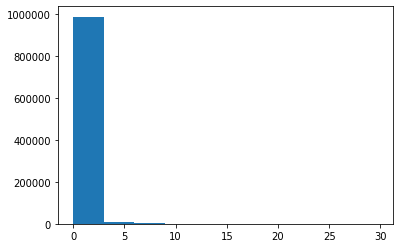

In [37]:
plt.hist(np.exp(truncnorm_Q.rvs(1000000)))

In [27]:
1e9 * 0.35

350000000.0

In [38]:
np.sum(calculate_volume_sphere(np.exp(truncnorm_Q.rvs(10000000)), diameter=True))

30160013.136991218

In [30]:
calculate_volume_sphere(0.120, diameter=True)

0.0009047786842338603

____

In [80]:
def calculate_N_crystals(csd, modal_fraction, total_volume=1e9, learning_rate=100):
    total_volume_mineral = 0
    requested_volume = total_volume * modal_fraction
    # numpy.append faster than using list.extend in code
#     crystals = np.array([])
#     crystals = []
    crystals_total = []

    while total_volume_mineral < requested_volume:
        diff = requested_volume - total_volume_mineral
        crystals_requested = int(diff / (modal_fraction*learning_rate)) + 1
        print(crystals_requested, end=" ")
        crystals_total.append(crystals_requested) 
        crystals_to_add = np.exp(csd.rvs(size=crystals_requested))
#         crystals = np.append(crystals, crystals_to_add)
#         crystals.extend(crystals_to_add)
        total_volume_mineral += np.sum(calculate_volume_sphere(crystals_to_add, diameter=True))
    #     print(total_volume_mineral, "\n")
    return crystals_total, np.sum(crystals_total), total_volume_mineral

In [96]:
modal_mineralogy[1]

array([0.30591989, 0.38159713, 0.26209888, 0.0188256 , 0.00799247,
       0.02356603])

In [112]:
%%time
minerals = ["Q", "P", "K", "B", "O", "A"]
minerals_N = {}

for i in range(6):
    print(minerals[i])
    minerals_N[minerals[i]] = calculate_N_crystals(csds_WA[i], modal_fraction=modal_mineralogy[5][i], learning_rate=1000)

Q
1000001 703236 495525 351676 245621 173764 122329 86661 60392 41974 30201 21116 14721 9945 7204 5187 3679 2616 1841 1179 784 507 379 267 170 159 108 105 48 P
1000001 878915 773032 676370 593396 519819 456677 400660 351647 307994 270068 237730 209068 184054 160834 141131 124429 108762 96230 85284 75278 65619 57657 50644 44092 38600 33907 29774 26158 23040 20281 17848 15602 13643 11842 10385 9061 7901 6836 6037 5234 4547 3983 3516 3052 2754 2503 2148 1828 1591 1403 1222 1096 934 831 688 621 539 483 456 378 320 289 265 231 196 155 147 117 98 75 40 39 38 28 28 28 27 27 26 26 K
1000001 717543 517841 375884 267517 188925 134657 96927 68561 49317 34548 25691 18777 13076 9217 6887 5081 3635 2607 2117 1622 1288 703 27 27 20 B
1000000 329968 108078 34807 10255 3748 1048 261 58 22 19 O
A
1000001 905270 818977 736878 664155 602882 544451 491323 442897 400818 363580 330308 297857 269232 243170 219964 200681 180623 163231 146630 131609 118829 106567 96492 88046 78046 70387 62935 56739 51246 46131 

In [111]:
# AZ
total = 0

for mineral in minerals:
    total += minerals_N[mineral][1]
    print(mineral, minerals_N[mineral][1])
print(total)

Q 54059055
P 69818762
K 20280845
B 7723466
O 20875453
A 58556943
231314524


In [98]:
# CA-EW
total = 0

for mineral in minerals:
    total += minerals_N[mineral][1]
    print(mineral, minerals_N[mineral][1])
print(total)

Q 1667333
P 3990425
K 6110871
B 333334
O 12186021
A 2064326
26352310


In [103]:
# CA-NS
total = 0

for mineral in minerals:
    total += minerals_N[mineral][1]
    print(mineral, minerals_N[mineral][1])
print(total)

Q 1778956
P 3686599
K 2043468
B 225846
O 284233
A 793712
8812814


In [107]:
# GR
total = 0

for mineral in minerals:
    total += minerals_N[mineral][1]
    print(mineral, minerals_N[mineral][1])
print(total)

Q 20711267
P 14338701
K 7941081
B 9327098
O 12571781
A 101358741
166248669


In [109]:
# MT
total = 0

for mineral in minerals:
    total += minerals_N[mineral][1]
    print(mineral, minerals_N[mineral][1])
print(total)

Q 10919323
P 26535391
K 31503060
B 8223161
O 10057995
A 6722115
93961045


In [113]:
# WA
total = 0

for mineral in minerals:
    total += minerals_N[mineral][1]
    print(mineral, minerals_N[mineral][1])
print(total)

Q 3381395
P 8182313
K 3542496
B 1488264
O 0.0
A 10381958
26976426.0


In [135]:
tester

array([0., 1., 2., 4., 5., 6.])

In [136]:
getsizeof(tester)

144

In [130]:
getsizeof(tester)

112

In [92]:
%load_ext line_profiler

In [24]:
%%time
tester = calculate_N_crystals(csds_AZ[3], modal_fraction=modal_AZ[3])

10000001 2588735 696450 211410 53996 12546 6239 745 86 77 73 60 Wall time: 3.06 s


In [77]:
%lprun -f calculate_N_crystals calculate_N_crystals(csds_AZ[0], modal_fraction=modal_AZ[0])

10000001 8996672 8090415 7263271 6516425 5856867 5269452 4731288 4252633 3830781 3443397 3092543 2777744 2490998 2240271 2023186 1813647 1630795 1467692 1317276 1174313 1058984 954980 862610 774944 696173 624866 557545 496089 448580 403934 362167 325590 291061 262937 236948 214732 193053 173248 158729 142606 127712 113803 102670 93649 84118 74791 68320 60580 53574 48133 42144 37416 33525 29872 26629 23202 20094 18118 16136 14503 13518 11777 10848 9833 8507 7589 7082 6728 6032 5557 4719 4409 3444 2504 2373 1707 1533 1323 1107 1010 974 894 875 819 796 723 704 687 631 592 577 452 436 406 394 390 382 243 227 223 214 208 140 139 138 123 

Timer unit: 1e-07 s

Total time: 16.1714 s
File: <ipython-input-56-4d970bd109f6>
Function: calculate_N_crystals at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def calculate_N_crystals(csd, modal_fraction, total_volume=1e9, learning_rate=100):
     2         1         32.0     32.0      0.0      total_volume_mineral = 0
     3         1         45.0     45.0      0.0      requested_volume = total_volume * modal_fraction
     4                                               # numpy.append faster than using list.extend in code
     5                                           #     crystals = np.array([])
     6                                           #     crystals = []
     7         1          8.0      8.0      0.0      crystals_total = []
     8                                           
     9       108       2861.0     26.5      0.0      while total_volume_mineral < requested_volume:
    10       107       1

In [74]:
%time tester_P = calculate_N_crystals(csds_AZ[5], modal_fraction=modal_AZ[5], learning_rate=50)

20000001 4774863 1235181 284019 97564 22370 9926 1709 Wall time: 4.33 s


In [75]:
np.sum(tester_P[0]), tester_P[1]

(26425633, 80001785.8329562)

In [76]:
2**16

65536

In [46]:
%time np.sum(calculate_volume_sphere(np.exp(csds_AZ[1].rvs(np.sum(tester_P[0]))), diameter=True))

Wall time: 8.52 s


349771505.99173033

In [47]:
%time np.exp(csds_AZ[1].rvs(np.sum(tester_P[0])))

Wall time: 7.03 s


array([0.0380036 , 0.00772837, 0.95296444, ..., 0.22952287, 0.04054685,
       0.40800456])

In [32]:
%lprun -f calculate_N_crystals calculate_N_crystals(csds_AZ[3], modal_fraction=modal_AZ[3])

10000001 2605662 705646 182375 34101 3853 1560 526 384 

Timer unit: 1e-07 s

Total time: 2.73999 s
File: <ipython-input-30-98f3f63d90ff>
Function: calculate_N_crystals at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def calculate_N_crystals(csd, modal_fraction, total_volume=1e9):
     2         1         17.0     17.0      0.0      total_volume_mineral = 0
     3         1         21.0     21.0      0.0      requested_volume = total_volume * modal_fraction
     4                                               # numpy.append faster than using list.extend in code
     5                                           #     crystals = np.array([])
     6         1          5.0      5.0      0.0      crystals = []
     7         1          4.0      4.0      0.0      crystals_total = []
     8                                           
     9        10        227.0     22.7      0.0      while total_volume_mineral < requested_volume:
    10         9        113.0     12.6      0

In [81]:
%%time
total_volume_Q = 0
total_volume = 1e9
modal_fraction = 0.08
requested_volume = total_volume * modal_fraction
crystals = np.array([])
crystals_total = []

while total_volume_Q < requested_volume:
    diff = requested_volume - total_volume_Q
#     print(diff)
    crystals_requested = int(diff / (modal_fraction*100)) + 1
    print(crystals_requested, end=" ")
    crystals_total.append(crystals_requested) 
    crystals_to_add = np.exp(truncnorm_Q.rvs(size=crystals_requested))
    crystals = np.append(crystals, crystals_to_add)
    total_volume_Q += np.sum(calculate_volume_sphere(crystals_to_add, diameter=True))
#     print(total_volume_Q, "\n")

10000001 6204322 3848273 2326992 1470845 939028 573906 365303 212668 132153 80016 43695 27488 16081 9751 5280 3570 1540 243 229 210 154 134 128 32 32 32 32 29 29 28 28 27 18 10 10 10 10 9 9 7 7 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 Wall time: 18.3 s


In [82]:
total_volume_Q

80000120.43646985

In [83]:
np.sum(crystals_total) / 1e6

26.262567

Based on 3-5 runs of above code block:  
(Without setting upper limit on CSD)   
Mineral: modal proportion #crystals in 1m³ based on CSDs for AZ, Heins(1992)  
- Q: 0.30 30-40 M  
- P: 0.35 10-15 M  
- K: 0.15  3- 5 M  
- B: 0.10  1- 4 M
- O: 0.02 23-25 M 
- A: 0.08   6-9 M

Based on 2 runs of above code block:  
(With setting upper limit on CSD of 30 mm crystals)   
Mineral: modal proportion #crystals in 1m³ based on CSDs for AZ, Heins(1992)  
- Q: 0.30 99 M  
- P: 0.35 53 M  
- K: 0.15 24 M  
- B: 0.10 13.5 M
- O: 0.02 37.5 M 
- A: 0.08 26 M

In [98]:
40+15+5+4+25+9

98

In [84]:
99+53+24+13.5+37.5+26

253.0

In [14]:
# Checking to see effect of number of size bins on total volume representation
stepsize = 0.02
bins = [2.0**x for x in np.arange(-10, 10, stepsize)]

In [15]:
bins_medians = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]

In [16]:
len(bins)

1000

In [17]:
bins_medians[-5:]

[948.8489687865026,
 962.0944067900675,
 975.5247442177532,
 989.142562169334,
 1002.9504777753941]

In [18]:
crystal_binned, _ = np.histogram(crystals, bins=bins)

In [19]:
np.sum(calculate_volume_sphere(np.array(bins_medians), diameter=True) * crystal_binned)

19898781.085896134

___

In [20]:
calculate_volume_sphere(crystals.max(), diameter=True)

76668273.25487155

In [13]:
crystals.min()

4.0616720262594845e-05

In [52]:
np.exp(csds[0].median())

2.718281828459045

In [57]:
n_crystals = 1e9 / calculate_volume_sphere(np.exp(csds[0].median()), diameter=True)
n_crystals/1e6

95.08629639359629

In [58]:
%%time
csd_sample = csds[0].rvs(int(n_crystals))
crystal_counts_binned_test, _ = np.histogram(np.exp(csd_sample), bins=bins)

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

In [59]:
csd_sample.nbytes / 1024 / 1024  # MB

725.4508666992188

In [60]:
%%time
test = (csds[0].pdf(bins)*int(n_crystals)).astype('int')

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> dtype('<U11')

In [61]:
pdf_normalized = csds[0].pdf(bins) / np.sum(csds[0].pdf(bins))

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U11'), dtype('<U11')) -> dtype('<U11')

In [ ]:
test = (pdf_normalized * n_crystals).astype('int')

In [ ]:
bins_medians = [1.5 * 2.0**x for x in np.arange(-10, 10.01, 0.01)]

In [41]:
test.dtype

dtype('int32')

In [43]:
2**32 / 1e9

4.294967296

In [40]:
6 * test.nbytes / 1024  # kB

46.8984375

In [194]:
test.sum()

95085508

In [195]:
bins_volumes = calculate_volume_sphere(np.array(bins_medians), diameter=True)

In [196]:
np.sum(test * bins_volumes) / 1e9

0.7296020964387707

<BarContainer object of 2001 artists>

(0.000244140625, 1024)

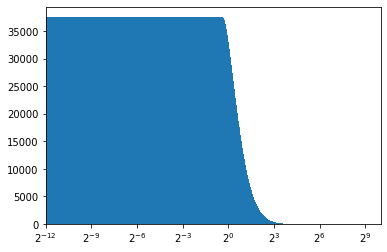

In [117]:
plt.bar(bins, test)
plt.gca().set_xscale('log', basex=2)
plt.xlim(2**-12, 2**10)

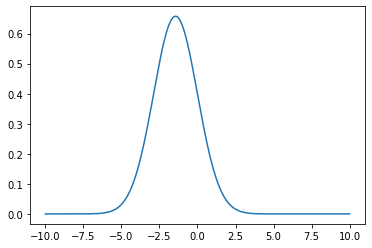

In [70]:
plt.plot(np.log2(bins), csds[0].pdf(bins))

In [27]:
np.exp(csds[0].mean())

5.2003257647899614

In [62]:
%%time
# Obtain crystal sizes per mineral class
crystal_sizes = []
for csd, crystals in zip(csds, counts):
#     print(csd, crystals)
    crystal_sizes.append(csd.rvs(size=crystals, random_state=1234))

Wall time: 1.97 ms


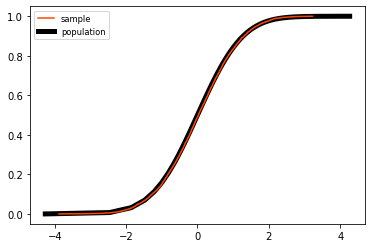

In [17]:
plt.plot(np.log(ecdf(crystal_sizes[0])[0]), ecdf(crystal_sizes[0])[1], 
         color='orangered', zorder=10, label="sample")

x = np.linspace(csds[0].ppf(0.00001), csds[0].ppf(0.99999), 1000)
plt.plot(np.log(x), csds[0].cdf(x), 
         color='k', lw=5, label="population")

plt.legend(fontsize='small')
plt.show();

In [21]:
# Bins according to phi scale in quarters (in mm)
# To Do: Make lower- and upper bin boundaries model parameters (and attributes)
bins = [2.0**x for x in np.arange(-10, 10.01, 0.01)]

In [67]:
crystal_counts_binned = np.zeros((6, 2000))
for i in range(6):
    crystal_counts_binned[i], _ = np.histogram(crystal_sizes[i], bins=bins)

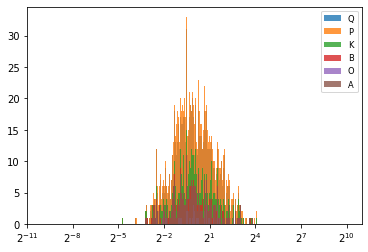

In [20]:
for i in range(6):
    plt.hist(crystal_sizes[i], bins=bins, label=minerals[i], alpha=0.8)
plt.gca().set_xscale('log', basex=2)
plt.legend(fontsize='small')
plt.show();

In [63]:
crystal_sizes_sum_total = 0
for i in range(6):
    print(minerals[i], crystal_sizes[i].sum())
    crystal_sizes_sum_total += crystal_sizes[i].sum()

Q 9918.392700030865
P 11450.004600725795
K 5140.702784406363
B 3245.63696652118
O 651.1386442209653
A 2789.404561612471


In [21]:
crystal_sizes_sum_total

33195.28025751764

In [24]:
crystal_sizes_volume_total = 0
for i in range(6):
    volumes = calculate_volume_sphere(crystal_sizes[i], diameter=True)
    print(minerals[i], volumes.sum())
    crystal_sizes_volume_total += volumes.sum()

Q 156190.83190647393
P 180345.1925750545
K 89892.80872030772
B 57613.65136188341
O 10024.37333383742
A 52009.45666716363


In [25]:
crystal_sizes_volume_total  # in mm³
crystal_sizes_volume_total / 1e9 # in m³

546076.3145647206

0.0005460763145647206

In [106]:
from sklearn.model_selection import train_test_split

In [112]:
train_test_split(np.random.randint(0, 3, (20)), train_size=0.7, random_state=1234)

[array([0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1]), array([0, 1, 1, 1, 2, 0])]

In [54]:
def split_size(n):
    if n > 10:
        split_size = (0.9-0.1) * prng.random_sample() + 0.1
    else:
        a = 1/n
        b = 1 - a
        split_size = (b-a) * prng.random_sample() + a
    return split_size

In [116]:
%%timeit
np.random.random(2)

1.27 µs ± 20.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [7]:
def mechanical_weathering(steps):
    composition_new = [1]
    single_crystals = 0
    threshold = 1e-8

    for i in range(steps):
    #     print(composition_new)
        composition_old = composition_new
        composition_new = []

        for comp in composition_old:
            a, b = np.random.random(2)
    #         print(a, b)
            # Normalize and b
            sum_ = a + b
            a, b = a/sum_, b/sum_

            # Move fractions smaller than threshold to single crystals count
            for split in [a, b]:
                if split * comp <= threshold:
                    single_crystals += 1
                else:
                    composition_new += [split * comp]
    #         composition_new += [a*comp, b*comp] 

In [8]:
%%time
mechanical_weathering(20)

Wall time: 3.2 s


In [105]:
a = np.array([[1, 2],
              [3, 4],
              [5, 6]])

b = np.array([[3],
              [2],
              [1]])

In [108]:
b.reshape((1, -1))

array([[3, 2, 1]])

In [146]:
a * b

array([[3, 6],
       [6, 8],
       [5, 6]])

In [152]:
(a * np.array([1, 2, 3]).reshape(-1, 1)).flatten()

array([ 1,  2,  6,  8, 15, 18])

In [70]:
100e6 * 1e-8

1.0

In [13]:
def mechanical_weathering_vectorized(steps, verbose=False, threshold=1e-8):
    """Threshold value is based on number of crystals that is expected to be 
    present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
    
    Example:
    --------
    200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
    When a proprtion is less than or equal to this threshold this would thus mean that 
    the pcg is no longer a pcg but has become a mcg.
    """
    composition_new = np.array([1])
    pcg_evolution = np.zeros(steps)
    mcg_evolution = np.zeros(steps)
    pcg_memory_usage = np.zeros(steps)
    single_crystals = 0

    for i in range(steps):
        composition_old = composition_new
        if verbose:
            print("composition_old", composition_old)
            print("composition_old_shape", composition_old.shape)
            
        # Obtain random fractions
        ab = np.random.random((2, composition_old.shape[0]))
        ab_norm = np.divide(ab, np.sum(ab, axis=0))
        if verbose:
            print("ab", ab)
            print("ab_norm", ab_norm)

        # Create new composition from old one and fractions
        composition_new = np.multiply(ab_norm.T, composition_old.reshape(-1, 1)).flatten()
        if verbose:
            print("composition_new", composition_new)
            print("composition_new_sum", np.sum(composition_new), "\n")
            
        # Move fractions smaller than threshold to single crystals count
        condition = composition_new <= threshold
        single_crystals += np.sum(condition)
        if verbose:
            print("single_crystals", single_crystals)
        composition_new = composition_new[~condition]
        
        if verbose:
            print("composition_new", composition_new)
            print("composition_new_sum", np.sum(composition_new), "\n")
        
        # Keep track of evolution of pcg and mcg
        pcg_evolution[i] = composition_new.shape[0]
        mcg_evolution[i] = single_crystals
        pcg_memory_usage[i] = composition_new.nbytes / 1024**2
        if composition_new.shape[0] == 0:
            print(i)
            break
        
    return composition_new, single_crystals, pcg_evolution, mcg_evolution, pcg_memory_usage

In [235]:
a = np.array([9, 2, 3, 6])
b = np.array([1, 8, 7, 4])

In [236]:
%timeit np.multiply(a, b)

484 ns ± 24 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [237]:
%timeit a * b

428 ns ± 8.79 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [189]:
%timeit ab = np.stack((a, b))

5.14 µs ± 291 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [191]:
np.stack((a, b))

array([[9, 2, 3, 6],
       [1, 8, 7, 4]])

In [190]:
%timeit ab = np.array((a, b))

1.32 µs ± 29.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [192]:
np.array((a, b))

array([[9, 2, 3, 6],
       [1, 8, 7, 4]])

In [174]:
ab = np.sort(ab, axis=0)
ab

array([[1, 2, 3, 4],
       [9, 8, 7, 6]])

In [13]:
1/200e6

5e-09

In [12]:
np.array([1/200e6], dtype='float32')

array([5.e-09], dtype=float32)

In [10]:
np.random.random(size=200000000).astype('float32').nbytes

800000000

In [9]:
200e6*8 / 1024**2

1525.87890625

In [33]:
def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
    """Threshold value is based on number of crystals that is expected to be 
    present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
    
    Example:
    --------
    200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
    When a proprtion is less than or equal to this threshold this would thus mean that 
    the pcg is no longer a pcg but has become a mcg.
    """
    composition = np.array([start_nr], dtype='uint32')
    pcg_evolution = np.zeros(steps, dtype='uint32')
    mcg_evolution = np.array([start_nr]*steps, dtype='uint32')
    pcg_memory_usage = np.zeros(steps, dtype='float64')
    single_crystals = 0

    for i in range(steps):
#         composition_old = composition_new
        if verbose:
            print("composition_old", composition)
            print("composition_old_shape", composition.shape)
            
        # Obtain random fractions to divide pcgs in two parts
        a_prop = np.random.random(composition.shape[0])
#         ab_norm = np.divide(ab, np.sum(ab, axis=0))
        if verbose:
            print("a_prop", a_prop)
#             print("ab_norm", ab_norm)

        # Create new composition from old one and fractions
        a = np.multiply(a_prop, composition).astype('uint32')
#         b = composition - a
        if verbose:
            print("a", a)
            print("b", composition - a)
        composition = np.array((a, composition - a))
        if verbose:
            print("composition_new", composition)
            print("composition_new_sum", np.sum(composition), "\n")
            
        # Move fractions smaller than threshold to single crystals count
        single_crystals += np.sum(composition == threshold)
        if verbose:
            print("single_crystals", single_crystals)
        # Remove single crystals and zero values from pcg array
        composition = composition[composition > threshold]
        
        if verbose:
            print("composition_new", composition)
            print("composition_new_sum", np.sum(composition), "\n")
        
        # Keep track of evolution of pcg and mcg numbers...
        pcg_evolution[i] = composition.shape[0]
        mcg_evolution[i] = single_crystals
        # ... and pcg_array memory usage
        pcg_memory_usage[i] = composition.nbytes / 1024**2
        
        # Break out of for loop if there are no more pcgs left
        if composition.shape[0] == 0:
            print(i)
            break
        
    return composition, single_crystals, pcg_evolution, mcg_evolution, pcg_memory_usage

In [34]:
%%time
tester2 = mechanical_weathering_absolute_vectorized(100, verbose=False, threshold=1, start_nr=200e6)

76
Wall time: 13 s


In [20]:
%%time
tester2 = mechanical_weathering_absolute_vectorized(100, verbose=False, threshold=1, start_nr=300e6)

80
Wall time: 29 s


In [212]:
%%time
tester2 = mechanical_weathering_absolute_vectorized(40, verbose=False, threshold=1, start_nr=200e6)

Wall time: 24.9 s


In [194]:
%%time
tester2 = mechanical_weathering_absolute_vectorized(40, verbose=False, threshold=1, start_nr=200e6)

Wall time: 35.6 s


In [185]:
%%time
tester2 = mechanical_weathering_absolute_vectorized(40, verbose=False, threshold=1, start_nr=200e6)

Wall time: 34.7 s


In [141]:
%%time
tester2 = mechanical_weathering_absolute_vectorized(40, verbose=False, threshold=1, start_nr=200e6)

Wall time: 1min 20s


In [216]:
mechanical_weathering_absolute_vectorized(5, verbose=True, threshold=1, start_nr=200e6)

composition_old [200000000]
composition_old_shape (1,)
a_prop [0.23296056]
a [46592112]
b [153407888]
composition_new [[ 46592112]
 [153407888]]
composition_new_sum 200000000 

single_crystals 0
composition_new [ 46592112 153407888]
composition_new_sum 200000000 

composition_old [ 46592112 153407888]
composition_old_shape (2,)
a_prop [0.18249185 0.75872631]
a [  8502680 116394600]
b [38089432 37013288]
composition_new [[  8502680 116394600]
 [ 38089432  37013288]]
composition_new_sum 200000000 

single_crystals 0
composition_new [  8502680 116394600  38089432  37013288]
composition_new_sum 200000000 

composition_old [  8502680 116394600  38089432  37013288]
composition_old_shape (4,)
a_prop [0.16560679 0.19156219 0.7869242  0.72038634]
a [ 1408101 22296804 29973495 26663867]
b [ 7094579 94097796  8115937 10349421]
composition_new [[ 1408101 22296804 29973495 26663867]
 [ 7094579 94097796  8115937 10349421]]
composition_new_sum 200000000 

single_crystals 0
composition_new [ 1408101 2

(array([  672723,  3281753,  5336449, 20160720,  3050301,  4256217,
          464797,  3455959,    94706,   565351,  7573225,  4755543,
          287771, 44893871,  2273684,  3054718,   349714, 17453381,
        15482083,  1001827,  1789437, 37650789,  1197297,  1423277,
          290958,   996319,  1581738,   745777,  1967070,  7296919,
         4180159,  2415467], dtype=int64),
 0,
 array([ 2.,  4.,  8., 16., 32.]),
 array([0., 0., 0., 0., 0.]),
 array([1.52587891e-05, 3.05175781e-05, 6.10351562e-05, 1.22070312e-04,
        2.44140625e-04]))

In [21]:
print("pcg:", tester2[0].shape[0], "\nmcg:", tester2[1])

pcg: 0 
mcg: 300000000


In [186]:
print("pcg:", tester2[0].shape[0], "\nmcg:", tester2[1])

pcg: 45118925 
mcg: 47103846


In [135]:
print("pcg:", tester2[0].shape[0], "\nmcg:", tester2[1])

pcg: 57826962 
mcg: 67951688


In [197]:
%%time
tester = mechanical_weathering_vectorized(40, verbose=False, threshold=0.5e-8)

Wall time: 26.2 s


In [18]:
print("pcg:", tester[0].shape[0], "\nmcg:", tester[1])

pcg: 0 
mcg: 177566


In [6]:
print("pcg:", tester[0].shape[0], "\nmcg:", tester[1])

pcg: 0 
mcg: 17735461


In [58]:
15 * 0.5

7.5

In [92]:
test = np.sort(np.array([[0.99, 0.01], [0.5, 0.5]]) * np.array([[15], [30]]))
test

array([[ 0.15, 14.85],
       [15.  , 15.  ]])

In [93]:
np.ceil(test[:, 0])

array([ 1., 15.])

In [94]:
np.floor(test[:, 1])

array([14., 15.])

In [106]:
%%timeit
total = 0

while total < 100:
    total += np.sum(np.random.random(100))

16.1 µs ± 474 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [103]:
total

array([100.26915625])

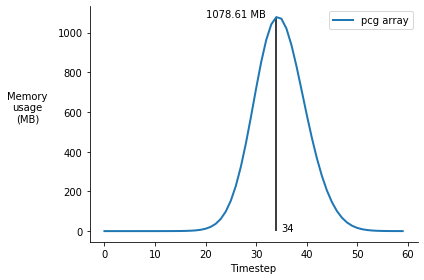

In [7]:
# Threshold set at 1e-9

# Memory usage of pcg array across timesteps
plt.plot(tester[4], lw=2, label='pcg array')
x_max = np.where(tester[4] == tester[4].max())[0][0]
y_max = tester[4].max()
# print(x_max, y_max)

# Annotate maximum memory usage
plt.annotate(f"{y_max:3.2f} MB", 
             (x_max, y_max),
             (20, y_max))
# Annotate timestep where maximum memory usage is reached
plt.annotate(x_max, 
             (x_max, 0),
             (x_max+1, 0))

plt.vlines(np.where(tester[4] == tester[4].max()), 0, tester[4].max())
plt.xlabel("Timestep")
plt.ylabel("Memory\nusage\n(MB)", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

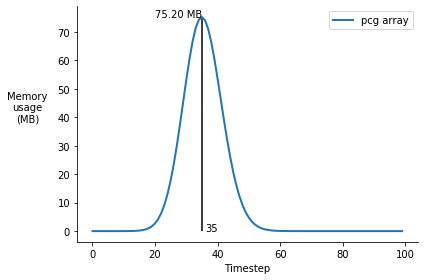

In [35]:
# Threshold set at 1, 200e6 crystals, unit32

tester = tester2

# Memory usage of pcg array across timesteps
plt.plot(tester[4], lw=2, label='pcg array')
x_max = np.where(tester[4] == tester[4].max())[0][0]
y_max = tester[4].max()
# print(x_max, y_max)

# Annotate maximum memory usage
plt.annotate(f"{y_max:3.2f} MB", 
             (x_max, y_max),
             (20, y_max))
# Annotate timestep where maximum memory usage is reached
plt.annotate(x_max, 
             (x_max, 0),
             (x_max+1, 0))

plt.vlines(np.where(tester[4] == tester[4].max()), 0, tester[4].max())
plt.xlabel("Timestep")
plt.ylabel("Memory\nusage\n(MB)", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

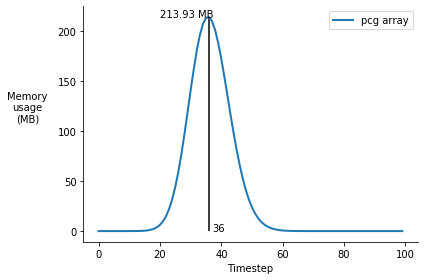

In [22]:
# Threshold set at 1, 300e6 crystals

tester = tester2

# Memory usage of pcg array across timesteps
plt.plot(tester[4], lw=2, label='pcg array')
x_max = np.where(tester[4] == tester[4].max())[0][0]
y_max = tester[4].max()
# print(x_max, y_max)

# Annotate maximum memory usage
plt.annotate(f"{y_max:3.2f} MB", 
             (x_max, y_max),
             (20, y_max))
# Annotate timestep where maximum memory usage is reached
plt.annotate(x_max, 
             (x_max, 0),
             (x_max+1, 0))

plt.vlines(np.where(tester[4] == tester[4].max()), 0, tester[4].max())
plt.xlabel("Timestep")
plt.ylabel("Memory\nusage\n(MB)", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

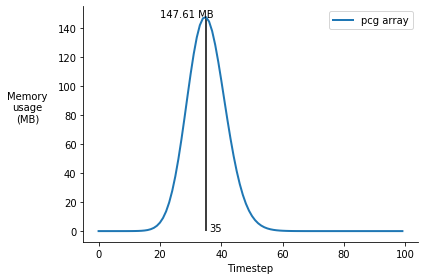

In [233]:
# Threshold set at 1, 200e6 crystals

tester = tester2

# Memory usage of pcg array across timesteps
plt.plot(tester[4], lw=2, label='pcg array')
x_max = np.where(tester[4] == tester[4].max())[0][0]
y_max = tester[4].max()
# print(x_max, y_max)

# Annotate maximum memory usage
plt.annotate(f"{y_max:3.2f} MB", 
             (x_max, y_max),
             (20, y_max))
# Annotate timestep where maximum memory usage is reached
plt.annotate(x_max, 
             (x_max, 0),
             (x_max+1, 0))

plt.vlines(np.where(tester[4] == tester[4].max()), 0, tester[4].max())
plt.xlabel("Timestep")
plt.ylabel("Memory\nusage\n(MB)", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

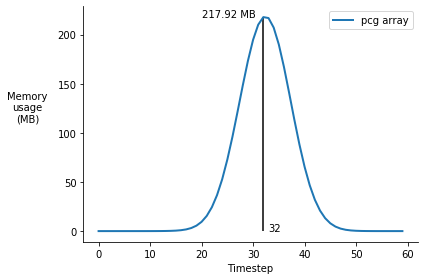

In [111]:
# Threshold set at 1e-8

# Memory usage of pcg array across timesteps
plt.plot(tester[4], lw=2, label='pcg array')
x_max = np.where(tester[4] == tester[4].max())[0][0]
y_max = tester[4].max()
# print(x_max, y_max)

# Annotate maximum memory usage
plt.annotate(f"{y_max:3.2f} MB", 
             (x_max, y_max),
             (20, y_max))
# Annotate timestep where maximum memory usage is reached
plt.annotate(x_max, 
             (x_max, 0),
             (x_max+1, 0))

plt.vlines(np.where(tester[4] == tester[4].max()), 0, tester[4].max())
plt.xlabel("Timestep")
plt.ylabel("Memory\nusage\n(MB)", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

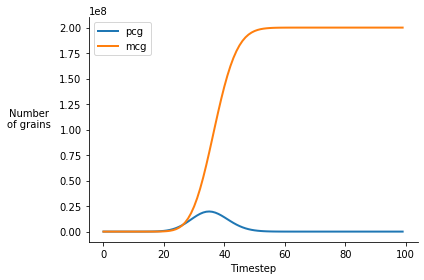

In [36]:
# Threshold set at 1, 200e6 crystals, unit32

tester = tester2

# Evoluton of number of pcg and mcg through timesteps
plt.plot(tester[2], lw=2, label="pcg")
plt.plot(tester[3], lw=2, label="mcg")
plt.xlabel("Timestep")
plt.ylabel("Number\nof grains", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

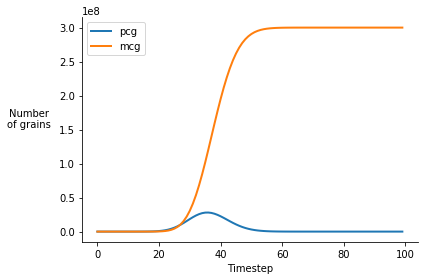

In [23]:
# Threshold set at 1, 300e6 crystals

tester = tester2

# Evoluton of number of pcg and mcg through timesteps
plt.plot(tester[2], lw=2, label="pcg")
plt.plot(tester[3], lw=2, label="mcg")
plt.xlabel("Timestep")
plt.ylabel("Number\nof grains", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

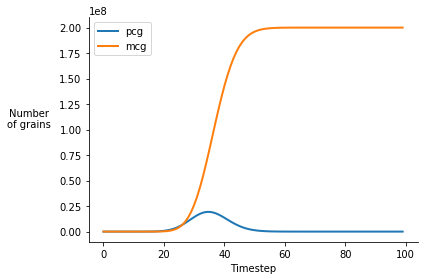

In [234]:
# Threshold set at 1, 200e6 crystals

tester = tester2

# Evoluton of number of pcg and mcg through timesteps
plt.plot(tester[2], lw=2, label="pcg")
plt.plot(tester[3], lw=2, label="mcg")
plt.xlabel("Timestep")
plt.ylabel("Number\nof grains", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

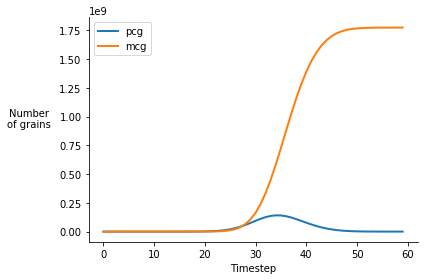

In [8]:
# Threshold set at 1e-9

# Evoluton of number of pcg and mcg through timesteps
plt.plot(tester[2], lw=2, label="pcg")
plt.plot(tester[3], lw=2, label="mcg")
plt.xlabel("Timestep")
plt.ylabel("Number\nof grains", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

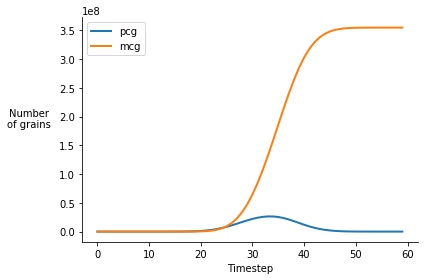

In [85]:
# Threshold set at 1e-8

# Evoluton of number of pcg and mcg through timesteps
plt.plot(tester[2], lw=2, label="pcg")
plt.plot(tester[3], lw=2, label="mcg")
plt.xlabel("Timestep")
plt.ylabel("Number\nof grains", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

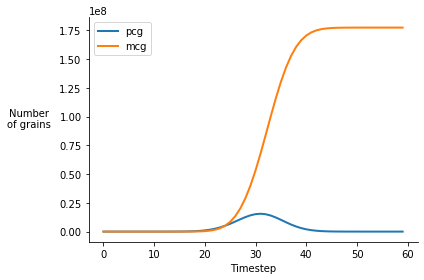

In [82]:
# Threshold set at 2e-8

# Evoluton of number of pcg and mcg through timesteps
plt.plot(tester[2], lw=2, label="pcg")
plt.plot(tester[3], lw=2, label="mcg")
plt.xlabel("Timestep")
plt.ylabel("Number\nof grains", rotation=0, labelpad=30)
plt.legend()
sns.despine()
plt.tight_layout()
plt.show();

In [50]:
tester[0].nbytes / 1024**2

0.0599822998046875

In [149]:
np.random.multinomial(200, [0.2, 0.8], 10)

array([[ 43, 157],
       [ 42, 158],
       [ 41, 159],
       [ 41, 159],
       [ 35, 165],
       [ 39, 161],
       [ 39, 161],
       [ 40, 160],
       [ 43, 157],
       [ 37, 163]])

In [38]:
%load_ext line_profiler
%load_ext memory_profiler

In [17]:
%mprun -f weathering.mechanical_weathering_vectorized weathering.mechanical_weathering_vectorized(30, threshold=0.5e-8)

Filename: d:\onedrive\documenten\programming\python\jupyter_notebooks\sedgen\sedgen\src\sedgen\weathering.py

Line #    Mem usage    Increment   Line Contents
     3    123.3 MiB    123.3 MiB   def mechanical_weathering_vectorized(steps, verbose=False, threshold=1e-8):
     4                                 """Threshold value is based on number of crystals that is expected to be 
     5                                 present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
     6                                 
     7                                 Example:
     8                                 --------
     9                                 200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
    10                                 When a proprtion is less than or equal to this threshold this would thus mean that 
    11                                 the pcg is no longer a pcg but has become a mcg.
    12   

In [94]:
%mprun -f weathering.mechanical_weathering_absolute_vectorized weathering.mechanical_weathering_absolute_vectorized(100)

77



Filename: d:\onedrive\documenten\programming\python\jupyter_notebooks\sedgen\sedgen\src\sedgen\weathering.py

Line #    Mem usage    Increment   Line Contents
    60    180.6 MiB    180.6 MiB   def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
    61                                 """Threshold value is based on number of crystals that is expected to be 
    62                                 present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
    63                                 
    64                                 Example:
    65                                 --------
    66                                 200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
    67                                 When a proprtion is less than or equal to this threshold this would thus mean that 
    68                                 the pcg is no longer a pcg but has b

In [16]:
%mprun -f weathering.mechanical_weathering_absolute_vectorized weathering.mechanical_weathering_absolute_vectorized(30)

Filename: d:\onedrive\documenten\programming\python\jupyter_notebooks\sedgen\sedgen\src\sedgen\weathering.py

Line #    Mem usage    Increment   Line Contents
    60    122.3 MiB    122.3 MiB   def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
    61                                 """Threshold value is based on number of crystals that is expected to be 
    62                                 present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
    63                                 
    64                                 Example:
    65                                 --------
    66                                 200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
    67                                 When a proprtion is less than or equal to this threshold this would thus mean that 
    68                                 the pcg is no longer a pcg but has b

In [14]:
%lprun -f mechanical_weathering_absolute_vectorized mechanical_weathering_absolute_vectorized(30)

Timer unit: 1e-07 s

Total time: 1.72689 s
File: <ipython-input-11-2d0e4ec2e899>
Function: mechanical_weathering_absolute_vectorized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
     2                                               """Threshold value is based on number of crystals that is expected to be 
     3                                               present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
     4                                               
     5                                               Example:
     6                                               --------
     7                                               200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
     8                                              

In [10]:
%lprun -f mechanical_weathering_absolute_vectorized mechanical_weathering_absolute_vectorized(30)

Timer unit: 1e-07 s

Total time: 1.80277 s
File: <ipython-input-4-e81054a884ff>
Function: mechanical_weathering_absolute_vectorized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
     2                                               """Threshold value is based on number of crystals that is expected to be 
     3                                               present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
     4                                               
     5                                               Example:
     6                                               --------
     7                                               200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
     8                                               

In [243]:
%lprun -f mechanical_weathering_absolute_vectorized mechanical_weathering_absolute_vectorized(30)

Timer unit: 1e-07 s

Total time: 1.85404 s
File: <ipython-input-242-d8a6c3b2daa0>
Function: mechanical_weathering_absolute_vectorized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
     2                                               """Threshold value is based on number of crystals that is expected to be 
     3                                               present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
     4                                               
     5                                               Example:
     6                                               --------
     7                                               200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
     8                                             

In [219]:
%lprun -f mechanical_weathering_absolute_vectorized mechanical_weathering_absolute_vectorized(30)

Timer unit: 1e-07 s

Total time: 2.65166 s
File: <ipython-input-215-47747a931316>
Function: mechanical_weathering_absolute_vectorized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
     2                                               """Threshold value is based on number of crystals that is expected to be 
     3                                               present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
     4                                               
     5                                               Example:
     6                                               --------
     7                                               200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
     8                                             

In [214]:
%lprun -f mechanical_weathering_absolute_vectorized mechanical_weathering_absolute_vectorized(30)

Timer unit: 1e-07 s

Total time: 4.84945 s
File: <ipython-input-210-24f78ae98550>
Function: mechanical_weathering_absolute_vectorized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
     2                                               """Threshold value is based on number of crystals that is expected to be 
     3                                               present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
     4                                               
     5                                               Example:
     6                                               --------
     7                                               200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
     8                                             

In [203]:
%lprun -f mechanical_weathering_absolute_vectorized mechanical_weathering_absolute_vectorized(30)

Timer unit: 1e-07 s

Total time: 3.74975 s
File: <ipython-input-200-62c30fe6b48c>
Function: mechanical_weathering_absolute_vectorized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
     2                                               """Threshold value is based on number of crystals that is expected to be 
     3                                               present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
     4                                               
     5                                               Example:
     6                                               --------
     7                                               200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
     8                                             

In [196]:
%lprun -f mechanical_weathering_absolute_vectorized mechanical_weathering_absolute_vectorized(30)

Timer unit: 1e-07 s

Total time: 3.9461 s
File: <ipython-input-193-dde7b1dc1951>
Function: mechanical_weathering_absolute_vectorized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
     2                                               """Threshold value is based on number of crystals that is expected to be 
     3                                               present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
     4                                               
     5                                               Example:
     6                                               --------
     7                                               200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
     8                                              

In [187]:
%lprun -f mechanical_weathering_absolute_vectorized mechanical_weathering_absolute_vectorized(30)

Timer unit: 1e-07 s

Total time: 5.05941 s
File: <ipython-input-183-a651df2d7579>
Function: mechanical_weathering_absolute_vectorized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
     2                                               """Threshold value is based on number of crystals that is expected to be 
     3                                               present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
     4                                               
     5                                               Example:
     6                                               --------
     7                                               200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
     8                                             

In [140]:
%lprun -f mechanical_weathering_absolute_vectorized mechanical_weathering_absolute_vectorized(30)

Timer unit: 1e-07 s

Total time: 11.259 s
File: <ipython-input-138-1e15c5000493>
Function: mechanical_weathering_absolute_vectorized at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def mechanical_weathering_absolute_vectorized(steps, verbose=False, threshold=1, start_nr=200e6):
     2                                               """Threshold value is based on number of crystals that is expected to be 
     3                                               present in one cubic meter of parent rock which in turn is based on the average bulk crystal size
     4                                               
     5                                               Example:
     6                                               --------
     7                                               200 million crystals in 1 m³ means that a proportion of 0.5e-8 presents one crystal.
     8                                              

In [23]:
1e6 * np.random.randint(0, high=5, size=(6, 200)).nbytes / 1024**3

4.470348358154297

In [11]:
calculate_equivalent_circular_diameter(1e9)

1240.7009817987996

In [39]:
2**25 / 1e6

33.554432

In [35]:
len(composition_new)

6309120

In [36]:
single_crystals

5995115

In [58]:
test_list = []

In [59]:
test_list += []
test_list

[]

In [37]:
len(composition_new)

1048576

In [41]:
composition_new_array = np.array(composition_new)

In [49]:
2e8 / 1e8

2.0

In [51]:
2e8 * 1e-8

2.0

In [52]:
np.sum(composition_new_array < 1e-8)

406164

In [40]:
np.min(ncomposition_new)

2.6814633045115137e-17

In [32]:
from sys import getsizeof

In [37]:
print(getsizeof(composition_new) / (1024**2), "MB")

48.53956604003906 MB


In [23]:
split_size(4)

NameError: name 'split_size' is not defined

In [141]:
# %%timeit
x1, x2 = train_test_split(crystal_sizes[0], train_size=(0.9-0.1) * prng.random_sample() + 0.1, random_state=1234)

In [240]:
test = np.arange(10000, dtype='int16')
test

array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int16)

In [231]:
test.dtype

dtype('int16')

In [248]:
labels = np.array([0]*5000 + [1]*5000, dtype='bool')

In [269]:
# Bins according to phi scale in quarters (in mm)
bins = [2.0**x for x in np.arange(-10, 10.1, 0.1)]

In [274]:
np.array(bins).nbytes *1e6 / (1024**3)

1.4975666999816895

In [278]:
np.random.randint(low=0, high=10000, size=200, dtype='uint16').nbytes

400

In [41]:
from scipy import sparse

In [42]:
from sys import getsizeof

In [102]:
tester = np.random.randint(0, 1, (10, 6, 2000), dtype='int32')

In [103]:
getsizeof(tester)

480128

In [104]:
tester.nbytes

480000

In [105]:
tester_sparse = sparse.dok_matrix(tester)

TypeError: Expected rank <=2 dense array or matrix.

In [100]:
getsizeof(tester_sparse)

295024

In [83]:
tester

dict_values([])

In [80]:
getsizeof(crystal_counts_binned[0])

96

In [81]:
crystal_counts_binned[0].nbytes

16000

In [70]:
crystal_counts_binned[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [71]:
np.array(bins)

array([9.76562500e-04, 9.83355029e-04, 9.90194804e-04, ...,
       1.00990229e+03, 1.01692672e+03, 1.02400000e+03])

**Sparse matrices would become interesting if the non-zero values to be stored are floats and not integers.**  
**By using appropriate datatypes, memory usage can be reduced**  

In [314]:
sparse_array = sparse.coo_matrix(crystal_counts_binned[0])
sparse_array.data.nbytes, sparse_array.row.nbytes, sparse_array.col.nbytes

(190, 380, 380)

In [330]:
sparse_array = sparse.csr_matrix(crystal_counts_binned[0])
sparse_array.data
sparse_array.dtype
sparse_array.indptr
sparse_array.indices
sparse_array.data.nbytes, sparse_array.indptr.nbytes, sparse_array.indices.nbytes
sparse_array.data.nbytes + sparse_array.indptr.nbytes + sparse_array.indices.nbytes

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  1.,  1.,
        2.,  1.,  1.,  1.,  3.,  2.,  3.,  2.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,  3.,  1.,  5.,  2.,
        3.,  2.,  2.,  3.,  1.,  3.,  3.,  2.,  1.,  2.,  4.,  4.,  2.,
        2.,  1.,  1.,  1.,  3.,  3.,  3.,  4.,  2.,  3.,  3.,  3.,  1.,
        1.,  2.,  3.,  2.,  1.,  1.,  2.,  2.,  3.,  2.,  6.,  3.,  1.,
        5.,  5.,  3.,  2.,  4.,  3.,  2.,  2., 10.,  4.,  2.,  3.,  4.,
        5.,  2.,  3.,  3.,  5.,  2.,  7.,  7.,  3., 12.,  7.,  5.,  3.,
        6.,  4.,  5.,  3.,  3.,  1.,  3.,  3.,  1.,  2.,  4.,  3.,  4.,
        6.,  5.,  3.,  6.,  2.,  5.,  7.,  3.,  4.,  7.,  2.,  3.,  6.,
        5.,  9.,  5.,  3.,  6.,  5.,  4.,  4.,  5.,  5.,  2., 11.,  3.,
        8.,  4.,  7.,  6.,  7.,  7.,  3., 10.,  9.,  5.,  5.,  9.,  7.,
        8.,  9.,  7.,  9.,  6.,  9.,  7.,  6.,  2.,  6.,  5.,  7

dtype('float64')

array([  0, 725], dtype=int32)

array([ 440,  480,  485,  504,  527,  529,  533,  545,  564,  568,  569,
        575,  602,  613,  614,  615,  616,  621,  623,  624,  625,  627,
        628,  629,  630,  631,  634,  643,  645,  647,  650,  653,  654,
        656,  657,  658,  660,  663,  666,  667,  671,  673,  674,  675,
        676,  678,  679,  680,  681,  682,  683,  684,  685,  687,  689,
        690,  692,  693,  694,  695,  696,  697,  699,  700,  701,  702,
        703,  704,  705,  706,  707,  708,  710,  711,  712,  713,  714,
        715,  716,  717,  718,  719,  720,  721,  722,  723,  724,  725,
        726,  727,  728,  729,  730,  731,  732,  733,  734,  735,  736,
        737,  738,  739,  740,  741,  742,  743,  744,  745,  746,  747,
        748,  749,  750,  751,  752,  753,  754,  755,  756,  757,  758,
        759,  760,  761,  762,  763,  764,  765,  766,  767,  768,  769,
        770,  771,  772,  773,  774,  775,  776,  777,  778,  779,  780,
        781,  782,  783,  784,  785,  786,  787,  7

(5800, 8, 2900)

8708

In [ ]:
sparse.random()

In [209]:
# %%timeit
testA1, testA2, labelsA1, labelsA2 = train_test_split(test, labels, train_size=split_size(test.size))

In [183]:
testB1, testB2 = train_test_split(test, 
                                train_size=split_size(test.size))

In [249]:
test.nbytes
labels.nbytes

20000

10000

In [226]:
1.3e8 / (1024*1024*1024)

0.12107193470001221

In [210]:
testA1
labelsA1
testA2
labelsA2

array([1270,  555, 6171, ..., 6679, 3488, 4346])

array([0, 0, 1, ..., 1, 0, 0])

array([ 787, 3362, 8373, ..., 6974, 7276, 8735])

array([0, 0, 1, ..., 1, 1, 1])

In [160]:
train_test_split(test1, train_size=split_size(test1.size))
train_test_split(test2, train_size=split_size(test2.size))

[array([4]), array([7])]

[array([6, 3, 1]), array([9, 0, 5, 2, 8])]

In [91]:
crystal_sizes

AttributeError: 'numpy.ndarray' object has no attribute 'szie'

In [84]:
crystal_sizes[0].shape

(6005,)

In [85]:
x1.shape, x2.shape

((711,), (5294,))

In [36]:
crystal_sizes[0]

array([1.6022921 , 0.30392458, 4.19002612, ..., 0.34813099, 0.38173981,
       3.76740571])

In [26]:
calculate_equivalent_circular_diameter(crystal_sizes_volume_total)

101.41096278205382

In [34]:
crystal_counts_binned

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   4.,
          3.,   2.,   8.,  14.,  20.,  45.,  53.,  95., 106., 131., 170.,
        193., 282., 300., 325., 385., 387., 416., 399., 417., 385., 355.,
        312., 255., 242., 184., 147., 115.,  78.,  69.,  49.,  19.,  15.,
         11.,   6.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   4.,
          3.,   4.,  11.,  15.,  23.,  47.,  56., 106., 119., 156., 191.,
        222., 324., 351., 395., 440., 461., 485., 458., 492., 443., 404.,
        357., 293., 278., 212., 164., 134.,  89.,  82.,  56.,  23.,  16.,
         13.,   8.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0

___

## Lognormal distribution tests

In [11]:
from scipy.stats import gmean

In [16]:
gmean(np.random.normal(5, 1, 10000))

4.9018317882522195

In [19]:
np.exp(np.mean(np.log(np.random.normal(5, 1, 10000))))

4.903473709354666

In [ ]:
np.mean(np.random.normal(5, 1, 10000))

In [14]:
np.mean(np.random.lognormal(0, 1, 10000))

1.676016677534841

In [134]:
tester1 = lognorm(1, 0, 16)
tester2 = lognorm(1, 0, 1)

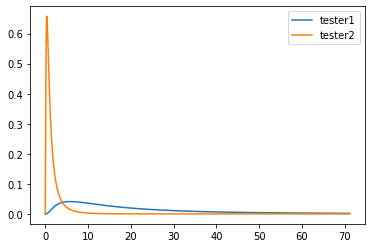

In [135]:
plt.plot(x, tester1.pdf(x), label="tester1")
plt.plot(x, tester2.pdf(x), label="tester2")
plt.legend()
plt.show();

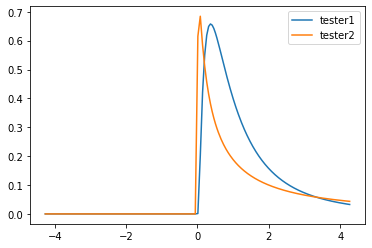

In [129]:
plt.plot(np.log(x), tester1.pdf(np.log(x)), label="tester1")
plt.plot(np.log(x), tester2.pdf(np.log(x)), label="tester2")
plt.legend()
plt.show();

In [80]:
mu = 0
sigma = 1

norm_test = norm(loc=3.54, scale=1.5)
# s = shape = sigma = std of underlying normal distribution
# loc = Z0 in Y = s * (Z - Z0) ** scale --> set loc=0 for standard lognormal behaviour
# scale = exp(mu) where mu = mean of underlying normal distribution = median of lognormal distribution
lognorm_test = lognorm(s=sigma, loc=0, scale=np.exp(mu))
# np.exp(mu) = geometric mean of underlying normal distribution N~(0, 1) or median of lognormal distribution

$$Y = s * (Z - loc)^{scale}$$
$$Y = \sigma * (Z - Z_0)^{\exp{\mu}}$$

In [87]:
x = np.linspace(-4, 4, 1000)

In [88]:
norm_sample = np.random.normal(0, 1, 10000)

In [89]:
lognorm_sample = np.random.lognormal(0, 1, 10000)

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements.

    Parameters:
    -----------
    n : int
        Number of data points
    x : list/array
        x-data for the ECDF
    y : list/array
        y-data for the ECDF

    Returns:
    --------
    x : list/array
        Data
    y : list/array
        cdf
    """

    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / float(n)

    return x, y

In [85]:
lognorm_sample_cdf = ecdf(np.log(lognorm_sample))

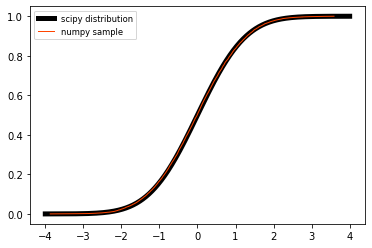

In [90]:
plt.plot(x, lognorm_test.cdf(np.exp(x)), c='k', lw=5, label="scipy distribution")
plt.plot(lognorm_sample_cdf[0], lognorm_sample_cdf[1], color='orangered', lw=1, label="numpy sample")
# plt.plot(x, norm_test.pdf(x), c="orangered")
plt.legend(fontsize='small')
plt.show();

In [14]:
np.exp(mu)

1.0

In [13]:
lognorm_test.stats()

(array(1.64872127), array(4.67077427))

In [465]:
# Formula for mean of lognormal distribution based on underlying normal distribution's mean and std
np.exp(mu + (sigma**2)/2)

1.6487212707001282

In [463]:
# Formula for variance of lognormal distribution based on underlying normal distribution's mean and std
(np.exp(sigma**2) - 1) * np.exp(2*mu+sigma**2)

4.670774270471604

In [17]:
np.sqrt(4.67)

2.1610182784974308

In [480]:
lognorm_test.stats()[0] * np.sqrt(lognorm_test.stats()[1])

3.5632121497683826

In [249]:
def prepare_lognorm(mean, var):
    # Formula from https://en.wikipedia.org/wiki/Log-normal_distribution
    sigma = np.sqrt(np.log(1 + (float(var) / mean ** 2)))
    mu = np.log(mean / np.sqrt(1 + (float(var) / mean ** 2)))
    # Compute the scale for scipy
    # For more details, check: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html
    return lognorm(sigma, scale=np.exp(mu))
 

MEAN = 0.0001
VAR = 1 ** 2
cmp_mean, cmp_var = prepare_lognorm(MEAN, VAR).stats(moments='mv')
np.testing.assert_array_almost_equal([cmp_mean, cmp_var], [MEAN, VAR])

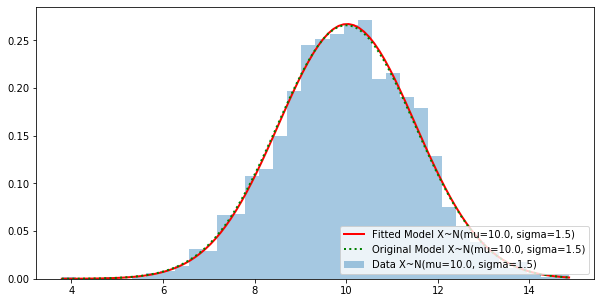

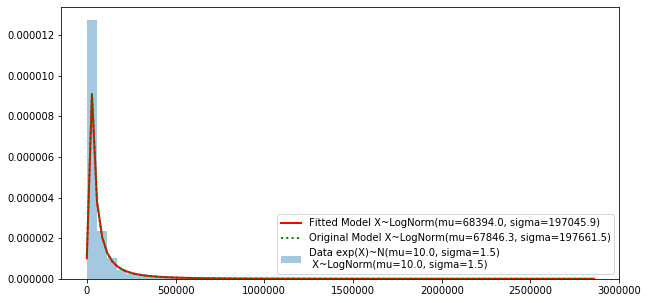

In [331]:
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mu = 10 # Mean of sample !!! Make sure your data is positive for the lognormal example 
sigma = 1.5 # Standard deviation of sample
N = 2000 # Number of samples

norm_dist = scipy.stats.norm(loc=mu, scale=sigma) # Create Random Process
x = norm_dist.rvs(size=N) # Generate samples

# Fit normal
fitting_params = scipy.stats.norm.fit(x)
norm_dist_fitted = scipy.stats.norm(*fitting_params)
t = np.linspace(np.min(x), np.max(x), 100)

# Plot normals
f, ax = plt.subplots(1, sharex='col', figsize=(10, 5))
sns.distplot(x, ax=ax, norm_hist=True, kde=False, label='Data X~N(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma))
ax.plot(t, norm_dist_fitted.pdf(t), lw=2, color='r',
        label='Fitted Model X~N(mu={0:.1f}, sigma={1:.1f})'.format(norm_dist_fitted.mean(), norm_dist_fitted.std()))
ax.plot(t, norm_dist.pdf(t), lw=2, color='g', ls=':',
        label='Original Model X~N(mu={0:.1f}, sigma={1:.1f})'.format(norm_dist.mean(), norm_dist.std()))
ax.legend(loc='lower right')
plt.show()


# The lognormal model fits to a variable whose log is normal
# We create our variable whose log is normal 'exponenciating' the previous variable

x_exp = np.exp(x)
mu_exp = np.exp(mu)
sigma_exp = np.exp(sigma)

fitting_params_lognormal = scipy.stats.lognorm.fit(x_exp, floc=0, scale=mu_exp)
lognorm_dist_fitted = scipy.stats.lognorm(*fitting_params_lognormal)
t = np.linspace(np.min(x_exp), np.max(x_exp), 100)

# Here is the magic I was looking for a long long time
lognorm_dist = scipy.stats.lognorm(s=sigma, loc=0, scale=np.exp(mu))

# The trick is to understand these two things:
# 1. If the EXP of a variable is NORMAL with MU and STD -> EXP(X) ~ scipy.stats.lognorm(s=sigma, loc=0, scale=np.exp(mu))
# 2. If your variable (x) HAS THE FORM of a LOGNORMAL, the model will be scipy.stats.lognorm(s=sigmaX, loc=0, scale=muX)
# with:
#    - muX = np.mean(np.log(x))
#    - sigmaX = np.std(np.log(x))


# Plot lognormals
f, ax = plt.subplots(1, sharex='col', figsize=(10, 5))
sns.distplot(x_exp, ax=ax, norm_hist=True, kde=False,
             label='Data exp(X)~N(mu={0:.1f}, sigma={1:.1f})\n X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(mu, sigma))
ax.plot(t, lognorm_dist_fitted.pdf(t), lw=2, color='r',
        label='Fitted Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist_fitted.mean(), lognorm_dist_fitted.std()))
ax.plot(t, lognorm_dist.pdf(t), lw=2, color='g', ls=':',
        label='Original Model X~LogNorm(mu={0:.1f}, sigma={1:.1f})'.format(lognorm_dist.mean(), lognorm_dist.std()))
ax.legend(loc='lower right')
plt.show()

___

___

## Random dataset generation

In [105]:
# Minerals present
minerals = ["Q" ,"P", "K", "B", "O", "A"]

In [3]:
# Initialize dataset
dataset = Input(["Q" ,"P", "K", "B", "O", "A"])

In [16]:
# Set custom proportion of minerals
dataset.set_random_mineral_proportions()

array([0.06199479, 0.20137643, 0.14169234, 0.25422035, 0.25247794,
       0.08823815])

In [15]:
dataset.get_number_of_crystals()

hello


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
np.random.random()

In [18]:
minerals_csd = dataset.set_random_grain_size_distributions()

In [8]:
pd.DataFrame(dataset.get_number_of_crystals(), index=[["Q" ,"P", "K", "B", "O", "A"]])

,0,1,2,3,4,5,6,7,8,9
Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
from scipy.stats import lognorm

In [11]:
dataset.get_interface_labels()

['QQ',
 'QP',
 'QK',
 'QB',
 'QO',
 'QA',
 'PP',
 'PK',
 'PB',
 'PO',
 'PA',
 'KK',
 'KB',
 'KO',
 'KA',
 'BB',
 'BO',
 'BA',
 'OO',
 'OA',
 'AA']

In [13]:
dataset.get_number_of_crystals()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## SedGen algorithms
____

**Assumptions**
- All grains are spherical  

**Relations**  
- $X = Y+Z$

In [72]:
m = 6  # number of mineral species
d = 10 # number of size classes forming a geometric series
n_c_pcg = np.zeros((m, d))  # Y (m x d) number of crystals forming part of polycrystalline grains (pcg)
n_c_mcg = np.zeros((m, d))  # Z (m x d) number of crystals occurring as monocrystalline grains (mcg)
n_g_pcg = np.zeros((1, d))  # R (1 x d) number of polycrystalline grains (pcg)

n_c_all = n_c_mcg + n_c_pcg  # X (m x d) number of crystals in parent rock
n_g_all = n_c_mcg + n_g_pcg  # (m x d) number of grains in parent rock

In [173]:
n_c_pcg_df = pd.DataFrame(n_c_pcg, index=minerals)
n_c_mcg_df = pd.DataFrame(n_c_mcg, index=minerals)
n_g_pcg_df = pd.DataFrame(n_g_pcg)

In [176]:
n_c_pcg_df.loc[:, 9] = [10000, 2000, 3000, 1000, 200, 300]
n_g_pcg_df.loc[:, 9] = [1]

In [177]:
n_c_pcg_df
n_g_pcg_df

,0,1,2,3,4,5,6,7,8,9
Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000
P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000
K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3000
B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000
O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [163]:
bins = [2.0**x for x in np.arange(-10, 10.25, 0.25)]

In [164]:
bins

[0.0009765625,
 0.0011613350732448448,
 0.0013810679320049757,
 0.0016423758110424111,
 0.001953125,
 0.0023226701464896895,
 0.0027621358640099515,
 0.0032847516220848223,
 0.00390625,
 0.004645340292979379,
 0.005524271728019903,
 0.0065695032441696445,
 0.0078125,
 0.009290680585958758,
 0.011048543456039806,
 0.013139006488339289,
 0.015625,
 0.018581361171917516,
 0.02209708691207961,
 0.026278012976678578,
 0.03125,
 0.03716272234383503,
 0.04419417382415922,
 0.052556025953357156,
 0.0625,
 0.07432544468767006,
 0.08838834764831845,
 0.10511205190671431,
 0.125,
 0.14865088937534013,
 0.1767766952966369,
 0.21022410381342863,
 0.25,
 0.29730177875068026,
 0.3535533905932738,
 0.42044820762685725,
 0.5,
 0.5946035575013605,
 0.7071067811865476,
 0.8408964152537145,
 1.0,
 1.189207115002721,
 1.4142135623730951,
 1.681792830507429,
 2.0,
 2.378414230005442,
 2.8284271247461903,
 3.363585661014858,
 4.0,
 4.756828460010884,
 5.656854249492381,
 6.727171322029716,
 8.0,
 9.513656920

In [165]:
np.log2(bins)

array([-10.  ,  -9.75,  -9.5 ,  -9.25,  -9.  ,  -8.75,  -8.5 ,  -8.25,
        -8.  ,  -7.75,  -7.5 ,  -7.25,  -7.  ,  -6.75,  -6.5 ,  -6.25,
        -6.  ,  -5.75,  -5.5 ,  -5.25,  -5.  ,  -4.75,  -4.5 ,  -4.25,
        -4.  ,  -3.75,  -3.5 ,  -3.25,  -3.  ,  -2.75,  -2.5 ,  -2.25,
        -2.  ,  -1.75,  -1.5 ,  -1.25,  -1.  ,  -0.75,  -0.5 ,  -0.25,
         0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,
        10.  ])

In [105]:
n ** 3

1152921504606846976

In [110]:
(n ** 3) / 1_000_000_000_000_000_000

1.152921504606847

In [166]:
len(bins)

81

In [167]:
n_c_pcg

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [12]:
n_c_mcg

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
n_g_pcg

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
n_c_all

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
mineral_labels = ["Q" ,"P", "K", "B", "O", "A"]

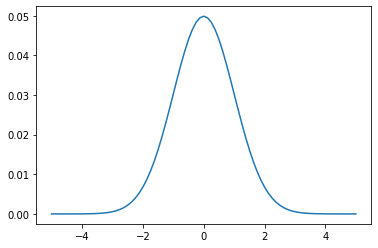

In [149]:
norm_distr = norm(loc=0, scale=1)
x = np.linspace(-5, 5, 81)
pdf = norm_distr.pdf(x)
pdf_normalized = pdf / pdf.sum()

plt.plot(x, pdf_normalized)
plt.show();

In [158]:
(1/2) * ((1/2) ** -2)

2.0

In [87]:
pdf_normalized[-1]

array([9.29199761e-07, 1.73962726e-05, 2.20372317e-04, 1.88891140e-03,
       1.09551886e-02, 4.29914254e-02, 1.14155686e-01, 2.05100619e-01,
       2.49338942e-01, 2.05100619e-01, 1.14155686e-01, 4.29914254e-02,
       1.09551886e-02, 1.88891140e-03, 2.20372317e-04, 1.73962726e-05,
       9.29199761e-07])

In [4]:
interface_labels = ["".join(pair) for pair in itertools.combinations_with_replacement(mineral_labels, 2)]
interface_labels

['QQ',
 'QP',
 'QK',
 'QB',
 'QO',
 'QA',
 'PP',
 'PK',
 'PB',
 'PO',
 'PA',
 'KK',
 'KB',
 'KO',
 'KA',
 'BB',
 'BO',
 'BA',
 'OO',
 'OA',
 'AA']

In [ ]:
interface_labels

## Mechanical weathering
____

In [ ]:
# Selection for breakage
# D = size of grain
# alpha_Qm = susceptibility to breakage normallized to monocrystalline quartz (Qm)
alpha_Qm = np.zeros((m, 1)) # CONSTANT
# delta_k = model time step
delta_k = int
# gamma = coefficient of time-step dependent strength of pcg # CONSTANT
gamma = float
# alpha = susceptibility to breakage
alpha = alpha_Qm + alpha_init * delta_k ** gamma
# z = abundance in the grain population
S = D * alpha * z
# probability of breakage ([m + 1] x d)
P = S / np.sum(S)

In [4]:
# Example values
mineral_constants = pd.DataFrame({"alpha_Qm": [1, 1.5, 1.2, 2, 3, 1.6]}, index=mineral_labels)
mineral_constants

,alpha_Qm
Q,1.0
P,1.5
K,1.2
B,2.0
O,3.0
A,1.6


### Inter-crystal breakage (of pcg)

In [27]:
# beta = (g x 1) susceptibility of mineral interface to breakage
interface_constants = pd.DataFrame({"beta_QQ": [(alpha[0] * alpha[1]) / 2 for alpha in itertools.combinations_with_replacement(mineral_constants["alpha_Qm"], 2)]}, index=interface_labels)
interface_constants

,beta_QQ
QQ,0.500
QP,0.750
QK,0.600
QB,1.000
QO,1.500
QA,0.800
PP,1.125
PK,0.900
PB,1.500
PO,2.250


### Intra-crystal breakage